**<h1>Ecommerce Customer Churn Analysis and Prediction</h1>**
<p align='right'>Charlie Inc. 2022</p>


## Bussines Problem Understanding

<a name="context"></a>
**Context**

<p align='justify'>
&emsp;&emsp;An E-Commerce company wants to know which of their customers are likely to go churn. As consultants employed by the company, we were provided with data in the form of spreadsheet without any details other than brief description of the columns. The company also provides its data anonymously. So we write down several assumptions to clarify some contexts:</p>

1. <p align='justify'>Churned customers are customers who delete their user account. Because if we look at the data, there are customers who haven't ordered for a long time but are considered not churn. Then, for customers who predominantly using the web app, there is a possibility that the app is not currently installed on their device. So seeing customers churn based on wheter or not they installed the app on their device is considered not suitable. Moreover, customers who delete the app from their device will be more difficult to be detected than those who delete their account.</p>
2. <p align='justify'>The E-Commerce company is presumably located in India. This assumptive information is confirmed by the presence of the 'UPI' value in the 'PaymentMethod' column. This 'UPI' most likely stands for Unified Payments Interface, a payment service that integrates the services of banks in India in an application.<a href="https://en.wikipedia.org/wiki/Unified_Payments_Interface"><sup>[1]</sup></a> The column 'CityTier' containing values of ​​1, 2, 3 also applies in India, because there are city levels in India determined by the Indian government to classify the amount of House Rent Allowance (HRA) for each city according to its level. Marked by city class X (tier-1), Y (tier-2), and Z (tier-3).<a href="https://en.wikipedia.org/wiki/Classification_of_Indian_cities"><sup>[2]</sup></a></p>
3. Other assumptions regarding the data can be seen in the Data Understanding: [Attribute Information](#attribute) section.

<p align='justify'>
&emsp;&emsp;The target in this case is customer churn. Churn itself is a lagging indicator or indication that occurs in a delayed manner. In this case, customer churn indicates a loss that has been ocurred for the company.<a href="https://cxl.com/blog/customer-churn"><sup>[3]</sup></a> Because each quitting customer is a customer who is no longer using their service. One solution to prevent churn or attrition is to focus on customer retention. The cost of acquiring new customers can be five to twenty-five times more expensive than retaining existing customers.<a href="https://hbr.org/2014/10/the-value-of-keeping-the-right-customers"><sup>[4]</sup></a> This makes sense because we don't need to allocate time and resources to attract new customers. Also statistically, loyal customers are also five times more likely to repurchase.<a href="https://www.getfeedback.com/resources/cx/40-stats-churn-customer-satisfaction"><sup>[5]</sup></a> So in the end we want to keep as many customers as possible.</p> 

<p align='justify'>
&emsp;&emsp;The company want to implement a strategy to prevent churn by offering promos (vouchers) to customers. However, in order to make the voucher offer as efficient as possible, the voucher should be given accordingly only to customers who do have the potential to churn. From the data provided by the company, there are about 5000 customer data, both still active ones and the ones who had churned.</p>

<u>Target:</u><br>
0: Not churn<br>
1: Churn
<br><br>
<hr>

<small> <sup>[1]</sup> <url>https://en.wikipedia.org/wiki/Unified_Payments_Interface</url></small><br>
<small> <sup>[2]</sup> <url>https://en.wikipedia.org/wiki/Classification_of_Indian_cities</url></small><br>
<small> <sup>[3]</sup> <url>https://cxl.com/blog/customer-churn</url></small><br>
<small> <sup>[4]</sup> <url>https://hbr.org/2014/10/the-value-of-keeping-the-right-customers</url></small><br>
<small> <sup>[5]</sup> <url>https://www.getfeedback.com/resources/cx/40-stats-churn-customer-satisfaction</url></small><br>

**Problem Statement**

<p align='justify'>
&emsp;&emsp;Customer churn is a major concern for large competitive companies in this era of information. Customer churn negatively impacts the company because of the potential loss of profit. In addition, if the company failed to identify the factors and prevent customer churn, they may also need to spend extra resources to gain new replacing customers. Though getting back customers are possible, e.g by attracting customers from competitors, or naturally by external factors such as increasing population or certain policies. However, getting new customers by utilizing such factors is more difficult and more expensive than retaining active customers. Therefore, the company needs to know which factors cause customers to churn so they can prevent them. The following are the research questions need to be answered:
</p>

<u></u>
1. What factors influence customer Churn behavior??
2. What is the right business strategy to minimize customer churn?? 

**Goals**

<p align='justify'>
&emsp;&emsp;Based on the problems, companies need to know the factors that cause customer churn and predict the probability of customer churn, so that companies can minimize losses by giving vouchers to the right target to prevent customer churn.
</p>

**Analytic Approach**

<p align='justify'>
&emsp;&emsp;Analyze the data to see the patterns of churned and non-churned customers, and create a classification model that can be used to predict the probability of customer churn.
</p>

**Metric Evaluation**

![Confusion Matrix](https://raw.githubusercontent.com/PurwadhikaDev/CharlieIncTeam_JC_DS_VL_03_FinalProject/f00bec0ad13c957a87f27a949c3fa23a01a6a6b2/ConfusionMatrix.png)

* Type 1 error : False Positive.
<p align='justify'>
Churned customers wrongly predicted as not churn.<br>
Consequences: this error means the company gives vouchers to the wrong targets. The correct target to receive the vouchers should be the probable churned customers, not still-active customers.
</p>
* Type 2 error : False Negative.
<p align='justify'>
Non-churned customers wrongly predicted as churn.<br>
Consequences: this error means loss of profit because of missing orders from churned customers caused by not receiving vouchers. This could've been prevented if the model predicted all the churn correctly.
</p>

<p align='justify'>
&emsp;&emsp;Based on the consequences, both Type 2 errors and Type 1 errors have their own risk that both equally important to pay attention to, because if the company makes investments that are inaccurately targeted customers who do not churn, it will cause unneeded extra resources to spend. Likewise, if Type 2 errors are not noticed, it will also make the company lose money because they lose orders from the churned customers. Therefore in this study, we try to create a model that reduces both the potential customer loss and the inaccurate investment to the customers. So, we need to pay attention to both precision and recall metrics by looking at the false negatives and the false positives. Therefore the metric that is appropriate in this study will be the F1 Score, as it considers both the precision and the recall.
</p>

## Data Understanding

Dataset source : https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

<u>Note:</u>
* Some features are categorical (Nominal, Ordinal, Binary). The categorical feature with the highest cardinality contains 7 unique values.
* However, there are some unique value redundancies in 2 features that can be reduced because they have the same meaning.
* Each row of data represents 1 customer information, whether it be the ones who have churned or those who have not.

<a name="attribute"></a>
<h3>Attribute Information</h3>

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| CustomerID | Integer | Unique customer ID |
| Churn | Integer | Binary Target: 0 - Not churn, 1 - Churn |
| Tenure | Float | Tenure of customer in organization |
| PreferredLoginDevice | String | Preferred login device of customer |
| CityTier | Integer | City tier |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| PreferredPaymentMode | String | Preferred payment method of customer |
| Gender | String | Gender of customer |
| HourSpendOnApp | Float | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | Integer | Total number of deceives is registered on particular customer |
| PreferedOrderCat | String | Preferred order category of customer in last month |
| SatisfactionScore | Integer | Satisfactory score of customer on service |
| MaritalStatus | String | Marital status of customer |
| NumberOfAddress | Integer | Total number of added added on particular customer |
| Complain | Integer | Binary, 1 - If any complaint has been raised in last month |
| OrderAmountHikeFromlastYear | Float | Percentage increases in order from last year |
| CouponUsed | Float | Total number of coupon has been used in last month |
| OrderCount | Float | Total number of orders has been places in last month |
| DaySinceLastOrder | Float | Day Since last order by customer |
| CashbackAmount | Integer | Average cashback in last month |

[<p align='right'>back to context</p>](#context)

<br>Other assumptions about the data:<br>
1. The currency is in Indian Rupee (symbol: ; code: INR).<a href="https://en.wikipedia.org/wiki/Indian_rupee"><sup>[6]</sup></a> INR is the currency unit in the 'CashbackAmount' column. The use of INR is also for the purposes of calculating profit and loss from churn customers and voucher targeting.</p>
2. <p align='justify'>Distance unit is in kilometer.<a href="https://en.wikipedia.org/wiki/Metrication_in_India"><sup>[7]</sup></a> It's in the 'WarehouseToHome' column.</p>
3. <p align='justify'>'Tenure' is in months, because there are tenure data in the range of tens to sixties. Realistically, if you look at the trend of the emergence of E-Commerce applications, there are only a few companies that run that long or corporates with large market sizes, and 60 years ago there are no existing E-commerce yet or even commercialized internet as per known today.</p>
4. <p align='justify'>'HourSpendOnApp' is in daily average, because the maximum data is only 5 hours.</p>

Regarding data types, the integer and float type can generally represent numeric features, and string data types can represent categorical features. However, in this case there are some exceptions, namely:
* CityTier: the data is in integer but is essentially ordinal-categorical data because it describes the level of cities in a country. However, as the data is already in integer form, there is no need to encode this ordinal data; and 
* Complain: the data is in integer but is essentially binary nominal-categorical data, where a value of 0 means that there are no complaints from the customers and a value of 1 means that customers have complained. Because the data is already in integer form, there is no need to encode this nominal data as well.

<h3>Libraries</h3>

In [ ]:
!pip install category_encoders

# Import Libraries

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Statistics
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, confusion_matrix, recall_score

# Save and Load Model
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h3>Load Dataset into Dataframe</h3>

In [ ]:
dataset = 'https://raw.githubusercontent.com/PurwadhikaDev/CharlieIncTeam_JC_DS_VL_03_FinalProject/master/E%20Commerce%20Dataset.csv'

df = pd.read_csv(dataset)

df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

<h3>Dataframe Summary</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

* There are total of 5630 rows and 20 columns
* There are several columns that have missing values (non-null count not full)
* The dataset has 7 columns of float data type, 8 columns of integer data type, and 5 columns of object data type

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

From the results of the missing values aggregation above, it can be seen the missing values occur in the following columns:<br>`Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`.

<h4>Defining Categorical Features</h4>

In general, columns with the object data type will be categorical features. Additionaly, even though the columns `Complain`, `CityTier`, and `SatisfactionScore` are stored as integer, they will also be included as categorical features. Because essentially, those features are also considered categorical data type where `Complain` is nominal - binary data, then `CityTier` and `SatisfactionScore` are ordinal data.

In [ ]:
# integer-type categorical features
encoded_cat_features = ['Complain', 'CityTier', 'SatisfactionScore']

In [ ]:
# defining all categorical features
cat_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O') | (feature in encoded_cat_features))]
print(f'{len(cat_features)} Categorical Features:\n{cat_features}')

8 Categorical Features:
['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']


In [ ]:
# describing integer-type categorical features
listEncoded = []
for col in encoded_cat_features :
    listEncoded.append([df[col].count(), df[col].nunique(), df[col].max(), df[col].value_counts().max()]);

dfEncoded = pd.DataFrame(columns=['count', 'unique', 'top', 'freq'],
                     data=listEncoded, index=encoded_cat_features)

The columns to consider when describing categorical features are: ['count', 'unique', 'top', 'freq']. The following is the table of categorical features descriptions:

In [ ]:
# describe all categorical features
df.describe(include=['O']).transpose().append(dfEncoded)

count unique                 top  freq
PreferredLoginDevice  5630      3        Mobile Phone  2765
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
MaritalStatus         5630      3             Married  2986
Complain              5630      2                   1  4026
CityTier              5630      3                   3  3666
SatisfactionScore     5630      5                   5  1698

Based on the categorical features description table above, it can be seen that:
* there are no missing values in all the categorical features
* data with the highest cardinality contains 7 unique values, and the lowest is in the form of binary (2 unique values)
* the mode of each features can be seen in the `top` column and the number of occurrences of the mode can be seen in the `freq` column

<h3>Data cardinalities of categorical features</h3>

In [ ]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in PreferredLoginDevice:  3
Unique values:  ['Mobile Phone' 'Phone' 'Computer']

Total unique values in CityTier:  3
Unique values:  [3 1 2]

Total unique values in PreferredPaymentMode:  7
Unique values:  ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Total unique values in Gender:  2
Unique values:  ['Female' 'Male']

Total unique values in PreferedOrderCat:  6
Unique values:  ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Total unique values in SatisfactionScore:  5
Unique values:  [2 3 5 4 1]

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Divorced' 'Married']

Total unique values in Complain:  2
Unique values:  [1 0]



It can be seen that there are some redundancies in the unique values of some columns, namely:
* In `PreferredLoginDevice` there is redundancy between `Mobile Phone` and `Phone` value, because both refer to the mobile phone device.
* Something similar happened in `PreferredOrderCat`. Redundancy is between `Mobile` and `Mobile Phone` value which also refers to mobile phone.
* In `PreferredPaymentMode` there is redundancy between `COD` and `Cash on Delivery` because both refer to the `Cash on Delivery` payment method.
* In the same column, redundancy also occurs on `CC` and `Credit Card`, both refer to the credit card.

<h3>Defining Numerical Features</h3>

In general, columns of float and integer data type will be defined as numeric features, except:
- `Churn`, because it will be the classification target
- `Complain`, `CityTier`, `SatisfactionScore`, because they are categorical data
- `CustomerID`, because unique ID will not be used further in the analysis

In [ ]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn', 'Complain', 'CityTier', 'SatisfactionScore', 'CustomerID']))]
  
print(f'{len(num_features)} Numerical Features:\n{num_features}')

10 Numerical Features:
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


<h3>Central tendency, Dispersion, and Distribution Points of Numerical Features</h3>

The following is the table for descriptive statistics of all numerical features:

In [ ]:
df.describe().transpose()

count          mean          std      min  \
CustomerID                   5630.0  52815.500000  1625.385339  50001.0   
Churn                        5630.0      0.168384     0.374240      0.0   
Tenure                       5366.0     10.189899     8.557241      0.0   
CityTier                     5630.0      1.654707     0.915389      1.0   
WarehouseToHome              5379.0     15.639896     8.531475      5.0   
HourSpendOnApp               5375.0      2.931535     0.721926      0.0   
NumberOfDeviceRegistered     5630.0      3.688988     1.023999      1.0   
SatisfactionScore            5630.0      3.066785     1.380194      1.0   
NumberOfAddress              5630.0      4.214032     2.583586      1.0   
Complain                     5630.0      0.284902     0.451408      0.0   
OrderAmountHikeFromlastYear  5365.0     15.707922     3.675485     11.0   
CouponUsed                   5374.0      1.751023     1.894621      0.0   
OrderCount                   5372.0      3.008004     2.939680      1.0   
DaySinceLastOrder            5323.0      4.543491     3.654433      0.0   
CashbackAmount               5630.0    177.221492    49.193869      0.0   

                                  25%      50%       75%      max  
CustomerID                   51408.25  52815.5  54222.75  55630.0  
Churn                            0.00      0.0      0.00      1.0  
Tenure                           2.00      9.0     16.00     61.0  
CityTier                         1.00      1.0      3.00      3.0  
WarehouseToHome                  9.00     14.0     20.00    127.0  
HourSpendOnApp                   2.00      3.0      3.00      5.0  
NumberOfDeviceRegistered         3.00      4.0      4.00      6.0  
SatisfactionScore                2.00      3.0      4.00      5.0  
NumberOfAddress                  2.00      3.0      6.00     22.0  
Complain                         0.00      0.0      1.00      1.0  
OrderAmountHikeFromlastYear     13.00     15.0     18.00     26.0  
CouponUsed                       1.00      1.0      2.00     16.0  
OrderCount                       1.00      2.0      3.00     16.0  
DaySinceLastOrder                2.00      3.0      7.00     46.0  
CashbackAmount                 146.00    163.0    196.00    325.0

Based on the table above, it can be seen that:
- The number of `CustomerID` data is equal to the total number of data (5630) and each data has unique value, ranging from 50001 to 55631 (5630)
- `Churn` and `Complain` are nominal-binary data
- The maximum value in `Tenure` is 61, so most likely the unit of `Tenure` is in months, not years
- The maximum value in `HourSpendOnApp` is only 5 hours, possibly representing daily average of the application usage, not the all-time usage

## Initial Data Analysis and Data Cleaning

### Duplicated Rows

In [ ]:
# Jumlah baris terduplikasi
df.duplicated().sum()

0

There are no duplicated rows.

### Drop Unique Identifier

First, `CustomerID` can be dropped because it will not be used for analysis and modeling. To ensure, we check if really there's any duplicated customerID.

In [ ]:
print('Duplicated CustomerID occurences:')
print('->', df['CustomerID'].duplicated().any().sum())

Duplicated CustomerID occurences:
-> 0


In [ ]:
df.drop(columns = 'CustomerID', inplace=True)

### Re-Check Duplicated Rows

We recheck for duplicates after Customer ID has been dropped.

In [ ]:
duplicated_rows = df.duplicated().sum()

if duplicated_rows != 0:
  print('-> There are', duplicated_rows, 'duplicated rows')
else:
  print('-> There are no duplicated rows')

-> There are 556 duplicated rows


It turns out that after `CustomerID` is dropped, duplicated rows appear. This happens because there are rows that have the exact same data values but from different `CustomerIDs`.

In [ ]:
df[df.duplicated()].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1347      1     NaN                Phone         1              8.0   
1359      1     NaN                Phone         1             30.0   
1395      1    11.0         Mobile Phone         1              6.0   
1456      1     0.0             Computer         1             13.0   
1485      1     0.0                Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1347                  UPI    Male             3.0                         4   
1359           Debit Card    Male             2.0                         4   
1395           Debit Card    Male             3.0                         4   
1456           Debit Card    Male             3.0                         5   
1485          Credit Card  Female             2.0                         3   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1347              Mobile                  3        Single                7   
1359              Mobile                  3        Single                6   
1395             Fashion                  3        Single               10   
1456  Laptop & Accessory                  3        Single                2   
1485        Mobile Phone                  5        Single                8   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1347         1                         15.0         0.0         1.0   
1359         1                         14.0         0.0         1.0   
1395         1                         13.0         0.0         1.0   
1456         1                         24.0         1.0         1.0   
1485         0                         22.0         1.0         1.0   

      DaySinceLastOrder  CashbackAmount  
1347                0.0             121  
1359                3.0             120  
1395                0.0             154  
1456                6.0             161  
1485                4.0             142

Here are some examples of the duplicate data occurrences:

In [ ]:
df.loc[(df['Churn'] == 1) & (df['Tenure'] == 11) & (df['PreferredLoginDevice'] == 'Mobile Phone') & (df['CityTier'] == 1) & (df['WarehouseToHome'] == 6)]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
11        1    11.0         Mobile Phone         1              6.0   
1395      1    11.0         Mobile Phone         1              6.0   

     PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
11             Debit Card   Male             3.0                         4   
1395           Debit Card   Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
11            Fashion                  3        Single               10   
1395          Fashion                  3        Single               10   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
11           1                         13.0         0.0         1.0   
1395         1                         13.0         0.0         1.0   

      DaySinceLastOrder  CashbackAmount  
11                  0.0             154  
1395                0.0             154

In [ ]:
df.loc[(df['Churn'] == 1) & (df['Tenure'] == 0) & (df['PreferredLoginDevice'] == 'Computer') & (df['CityTier'] == 1) & (df['WarehouseToHome'] == 13) & (df['PreferredPaymentMode'] == 'Debit Card') & (df['Gender'] == 'Male')]

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
18        1     0.0             Computer         1             13.0   
1456      1     0.0             Computer         1             13.0   

     PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
18             Debit Card   Male             3.0                         5   
1456           Debit Card   Male             3.0                         5   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
18    Laptop & Accessory                  3        Single                2   
1456  Laptop & Accessory                  3        Single                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
18           1                         24.0         1.0         1.0   
1456         1                         24.0         1.0         1.0   

      DaySinceLastOrder  CashbackAmount  
18                  6.0             161  
1456                6.0             161

We will drop duplicates rows to avoid overfit on repeating data points as well to avoid information leakage if similar data occurs both on the train and the test set.

In [ ]:
print('amount of data before duplicate drop:', len(df))
df.drop_duplicates(inplace=True)
print('amount of data after duplicate drop:', len(df))

amount of data before duplicate drop: 5630
amount of data after duplicate drop: 5074


### Redundant Values

Here is some redundancy found in the `PreferredLogindevice`, `PreferredPaymentMode`, and `PreferedOrderCat`:

In [ ]:
print(f"PreferredLogindevice {df['PreferredLoginDevice'].unique()} ({df['PreferredLoginDevice'].nunique()})")
print(f"PreferredPaymentMode {df['PreferredPaymentMode'].unique()} ({df['PreferredPaymentMode'].nunique()})")
print(f"PreferedOrderCat {df['PreferedOrderCat'].unique()} ({df['PreferedOrderCat'].nunique()})")

PreferredLogindevice ['Mobile Phone' 'Phone' 'Computer'] (3)
PreferredPaymentMode ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'] (7)
PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] (6)


- In `PreferedLogindevice`, we will merge the values of 'Mobile Phone' and 'Phone' to 'Mobile Phone' only.
- In `PreferredPaymentMode`, we will merge 'CC' and 'Credit Card' values to 'Credit Card'. Likewise, 'COD' and 'Cash On Delivery' will be merged to 'Cash on Delivery'.
-In `PreferedOrderCat`, we will merge 'Mobile' and 'Mobile' Phone to just 'Mobile Phone'.

<h4>Merge synonymous Values</h4>

In [ ]:
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace('CC', 'Credit Card', inplace=True)
df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery', inplace=True)
df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone', inplace=True)

After the the merging of some redundant values, the unique values in those columns becomes less as follows:

In [ ]:
print(f"PreferredLogindevice {df['PreferredLoginDevice'].unique()} ({df['PreferredLoginDevice'].nunique()})")
print(f"PreferredPaymentMode {df['PreferredPaymentMode'].unique()} ({df['PreferredPaymentMode'].nunique()})")
print(f"PreferedOrderCat {df['PreferedOrderCat'].unique()} ({df['PreferedOrderCat'].nunique()})")

PreferredLogindevice ['Mobile Phone' 'Computer'] (2)
PreferredPaymentMode ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet'] (5)
PreferedOrderCat ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery'] (5)


### Outliers

Outlier detection has a purpose to capture data points anomalies that are relatively far from the majority of other data observations. The detected outliers then can be considered to be dropped to prevent unwanted deviation to the data.

In [ ]:
def find_anomalies(feature):

    data = df[feature]
    min = data.min()
    max = data.max()

    q1 = data.quantile(0.25)
    q2 = data.quantile(0.50)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    limit = iqr * 1.5
    lower_limit = q1 - limit
    upper_limit = q3 + limit

    lower_outliers = len(df[df[feature] < lower_limit])
    upper_outliers = len(df[df[feature] > upper_limit])

    result = {'feature': feature,
            'iqr': iqr,
            'min': min,
            'lower_limit': lower_limit,
            '25%': q1,
            '50%': q2,
            '75%': q3,
            'upper_limit': upper_limit,
            'max': max,
            'lower_outliers': lower_outliers,
            'upper_outliers': upper_outliers}

    return(result)

The following are the outliers detected on the numerical features:

In [ ]:
list_outlier = []

for i in num_features:
  outlier = find_anomalies(i)

  list_outlier.append([outlier['feature'], outlier['iqr'], outlier['min'], outlier['lower_limit'],
                          outlier['25%'], outlier['50%'], outlier['75%'], outlier['upper_limit'], outlier['max'],
                          outlier['lower_outliers'], outlier['upper_outliers']]);

df_outlier = pd.DataFrame(columns=['feature', 'iqr', 'min', 'lower_limit', '25%', '50%', '75%', 'upper_limit', 'max', 'lower_outliers', 'upper_outliers'],
                     data=list_outlier)
df_outlier

feature   iqr   min  lower_limit    25%    50%    75%  \
0                       Tenure  14.0   0.0        -19.0    2.0    9.0   16.0   
1              WarehouseToHome  11.0   5.0         -7.5    9.0   13.0   20.0   
2               HourSpendOnApp   1.0   0.0          0.5    2.0    3.0    3.0   
3     NumberOfDeviceRegistered   1.0   1.0          1.5    3.0    4.0    4.0   
4              NumberOfAddress   4.0   1.0         -4.0    2.0    3.0    6.0   
5  OrderAmountHikeFromlastYear   5.0  11.0          5.5   13.0   15.0   18.0   
6                   CouponUsed   1.0   0.0         -0.5    1.0    1.0    2.0   
7                   OrderCount   2.0   1.0         -2.0    1.0    2.0    3.0   
8            DaySinceLastOrder   5.0   0.0         -5.5    2.0    3.0    7.0   
9               CashbackAmount  52.0   0.0         68.0  146.0  164.0  198.0   

   upper_limit    max  lower_outliers  upper_outliers  
0         37.0   61.0               0               4  
1         36.5  127.0               0               2  
2          4.5    5.0               3               3  
3          5.5    6.0             217             146  
4         12.0   22.0               0               4  
5         25.5   26.0               0              29  
6          3.5   16.0               0             610  
7          6.0   16.0               0             673  
8         14.5   46.0               0              57  
9        276.0  325.0              11             368

The outliers that are considered to be discarded are extreme outliers with only few amount:

- The extreme outliers can be seen from the difference between the largest data (`max`) to the `upper_outliers`, and the distance between the smallest data (`min`) to the `lower_outliers`. Of all the features with outliers, almost all of them are considered having extreme outliers except for `HourSpendOnApp`. In `HourSpendOnApp` the outlier distance is only at 0.5 (hours) from the lower and upper bound;
- While the outliers with few amounts can be seen from the relatively small numbers in the `lower_outliers` and `upper_outliers` columns. We can see these in `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, and `NumberOfAddress`, the amount of both lower and upper outliers in those features are relatively small compared to the total of more than 5000 data. If we eliminate these data, then the total amount of data should not change too significantly.

Based on the two points above, the outliers that meet the criteria to be deleted are `Tenure`, `WarehouseToHome`, and `NumberOfAddress`, because the outliers there are few and far from other data observations. To decide whether these outliers are really need to be removed, we do some further analysis.


<h4>Tenure</h4>

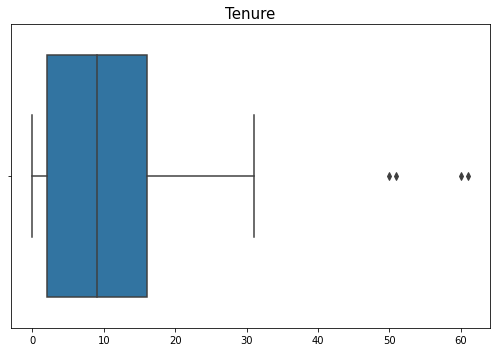

In [ ]:
feature = 'Tenure'

plt.figure(figsize=(7, 5))

ax = plt.subplot(1, 1, 1)
sns.boxplot(x=feature, data=df)
plt.title(feature, fontsize=15)    
plt.xlabel('')
plt.tight_layout();

In [ ]:
feature = 'Tenure'
limit_Tenure = df_outlier[df_outlier['feature'] == feature]['upper_limit'].item()

print(f'\nOutlier: {feature} > {limit_Tenure}\n')
pd.merge(df[df[feature] > limit_Tenure][feature], df[['Tenure', 'Churn', 'OrderCount']].reset_index()).set_index(feature).drop_duplicates()


Outlier: Tenure > 37.0



index  Churn  OrderCount
Tenure                          
50.0      928      0         2.0
60.0     2719      0         1.0
51.0     3743      0         3.0
61.0     5534      0         2.0

From the table above, there are 4 `Tenure` outliers. All of which is in the range of 50 to 61 months. But these outlier customers have only placed 3 orders at most. Based on these few numbers and also the few numbers of days since their last order, the data will make more sense if it comes from new users. So, probably these high `Tenure` numbers come from incorrect input and can be removed.

<h4>WarehouseToHome</h4>

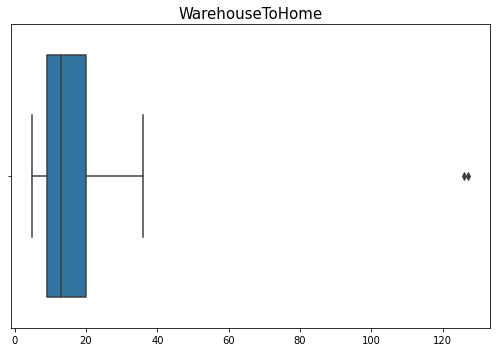

In [ ]:
feature = 'WarehouseToHome'

plt.figure(figsize=(7, 5))

ax = plt.subplot(1, 1, 1)
sns.boxplot(x=feature, data=df)
plt.title(feature, fontsize=15)    
plt.xlabel('')
plt.tight_layout();

In [ ]:
feature = 'WarehouseToHome'
limit_WarehouseToHome = df_outlier[df_outlier['feature'] == feature]['upper_limit'].item()

print(f'\nOutlier: {feature} > {limit_WarehouseToHome}\n')
pd.merge(df[df[feature] > limit_WarehouseToHome][feature], df[['WarehouseToHome', 'Churn', 'CityTier']].reset_index()).set_index(feature).drop_duplicates()


Outlier: WarehouseToHome > 36.5



index  Churn  CityTier
WarehouseToHome                        
126.0             1309      0         3
127.0             4124      0         3

In `WarehouseToHome`, it can be seen that there are 2 extreme outliers with values of 126 km and 127 km respectively. The possible cause is:
1. These outliers come from customers who live in suburbs or rural areas, so the far distance will make sense assuming the warehouse is in the urban area. However, this assumption still needs to be proven.
2. There is also a possibility that the data is inputted incorrectly, so this data can be dropped.

Based on these assumptions, we chose to drop the 'WarehouseToHome' outliers because there are only 2 outliers anyway, and these outliers are considered extreme. In addition, the assumption of point 1 is still needed to be proven.

<h4>NumberOfAddress</h4>

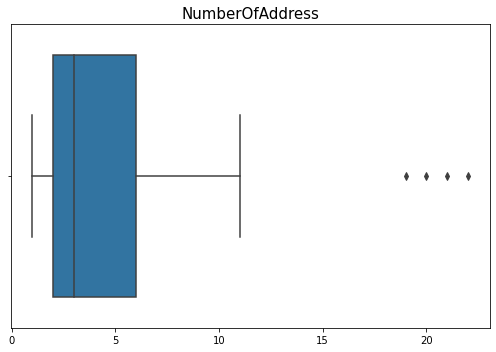

In [ ]:
feature = 'NumberOfAddress'

plt.figure(figsize=(7, 5))

ax = plt.subplot(1, 1, 1)
sns.boxplot(x=feature, data=df)
plt.title(feature, fontsize=15)    
plt.xlabel('')
plt.tight_layout();

In [ ]:
feature = 'NumberOfAddress'
limit_NumberOfAddress = df_outlier[df_outlier['feature'] == feature]['upper_limit'].item()

print(f'\nOutlier: {feature} > {limit_NumberOfAddress}\n')
pd.merge(df[df[feature] > limit_NumberOfAddress][feature], df[['NumberOfAddress', 'Churn', 'OrderCount']].reset_index()).set_index(feature).drop_duplicates()


Outlier: NumberOfAddress > 12.0



index  Churn  OrderCount
NumberOfAddress                          
19                 260      1         1.0
21                 691      0         1.0
20                3075      1         2.0
22                3506      0         2.0

From the table above, there are 4 outliers in `NumberOfAddress`, all of which have a total of 19-22 addresses. All of these outlier customers have placed orders only once or twice maximum. This may also indicate the possibility of incorrect input, so these outliers will be dropped.

<H4>Drop <i>Outliers</i></h4>

Outliers will be removed according to the predetermined deletion scheme.

In [ ]:
# drop outliers
outliers = df[((df.Tenure > limit_Tenure) | (df.WarehouseToHome > limit_WarehouseToHome) | (df.NumberOfAddress > limit_NumberOfAddress))].index

df.drop(outliers, inplace=True)

### Missing Values

There is some missing values in these following features:

In [ ]:
null_features = df.columns[df.isnull().any()].tolist()
print(f'{len(null_features)} Features containing missing value:\n{null_features}')

7 Features containing missing value:
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


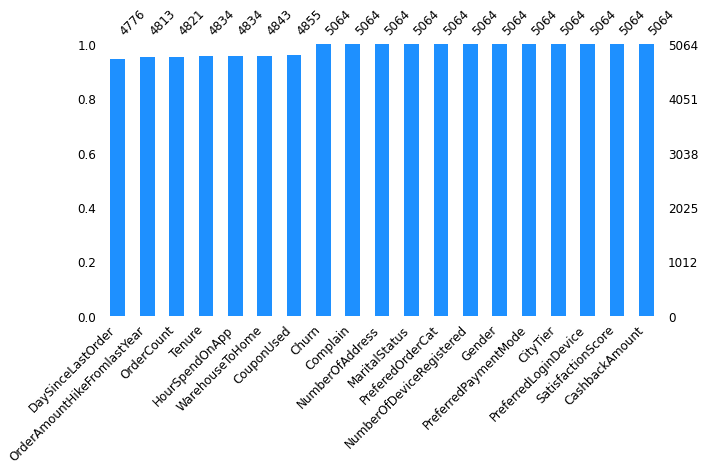

In [ ]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [ ]:
# non-null percentage for each column

(100 - df.isna().sum()/len(df)*100).sort_values().apply('{:,.2f} %'.format)

DaySinceLastOrder               94.31 %
OrderAmountHikeFromlastYear     95.04 %
OrderCount                      95.20 %
Tenure                          95.46 %
HourSpendOnApp                  95.46 %
WarehouseToHome                 95.64 %
CouponUsed                      95.87 %
Churn                          100.00 %
Complain                       100.00 %
NumberOfAddress                100.00 %
MaritalStatus                  100.00 %
PreferedOrderCat               100.00 %
NumberOfDeviceRegistered       100.00 %
Gender                         100.00 %
PreferredPaymentMode           100.00 %
CityTier                       100.00 %
PreferredLoginDevice           100.00 %
SatisfactionScore              100.00 %
CashbackAmount                 100.00 %
dtype: object

Let's see the amount of missing values from the data with positive churn label:

In [ ]:
df[df['Churn']==1].isna().sum()

Churn                           0
Tenure                         67
PreferredLoginDevice            0
CityTier                        0
WarehouseToHome                71
PreferredPaymentMode            0
Gender                          0
HourSpendOnApp                 50
NumberOfDeviceRegistered        0
PreferedOrderCat                0
SatisfactionScore               0
MaritalStatus                   0
NumberOfAddress                 0
Complain                        0
OrderAmountHikeFromlastYear    14
CouponUsed                      5
OrderCount                     16
DaySinceLastOrder              53
CashbackAmount                  0
dtype: int64

The data of churned customers have quite an amount of missing values. It is better if the missing values are not dropped then, because if the data from minority class is reduced, it will worsen the classification result.

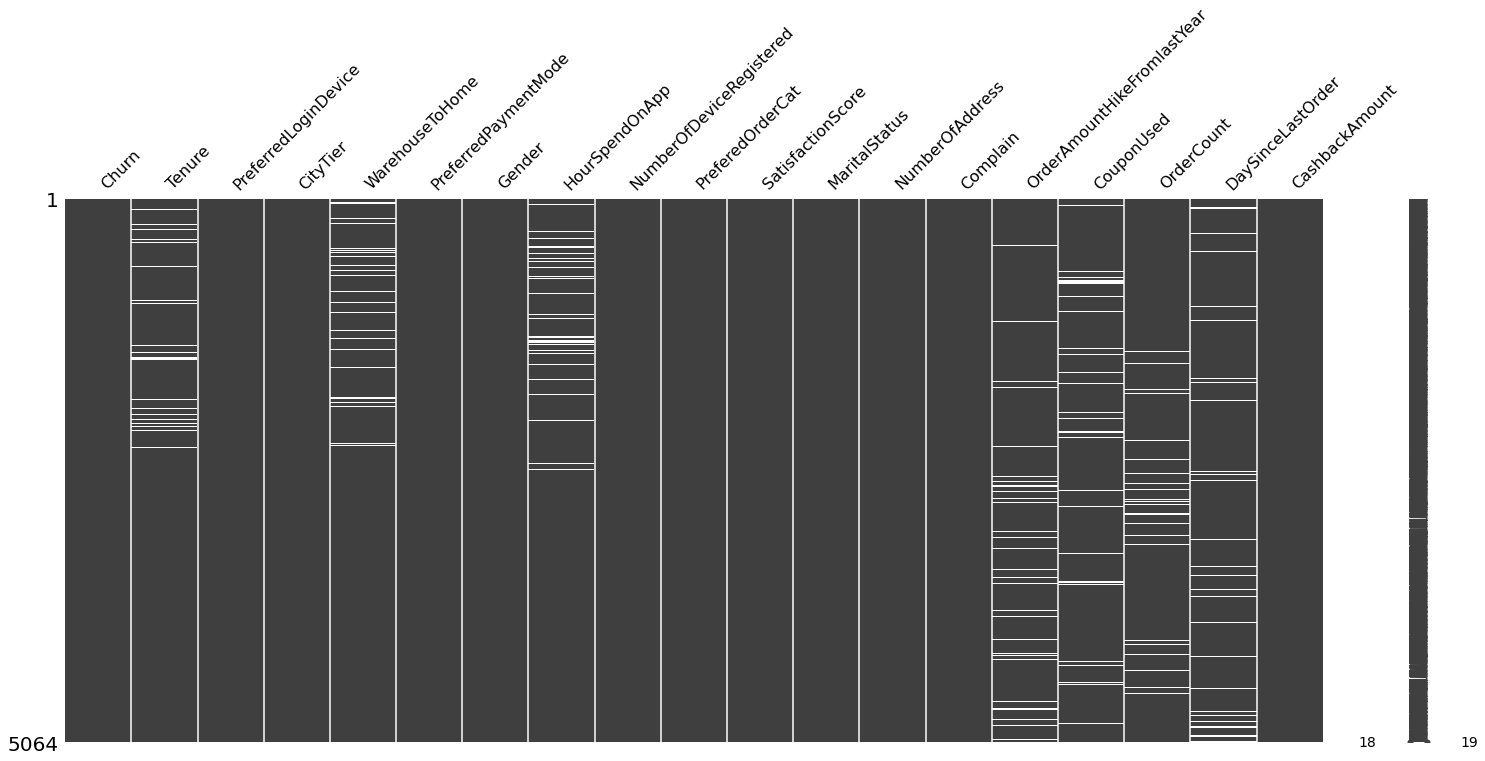

In [ ]:
missingno.matrix(df)

There are no pattern of the missing value occurrence. The missing value from one column doesn't appear at the same row as the missing value from other columns.

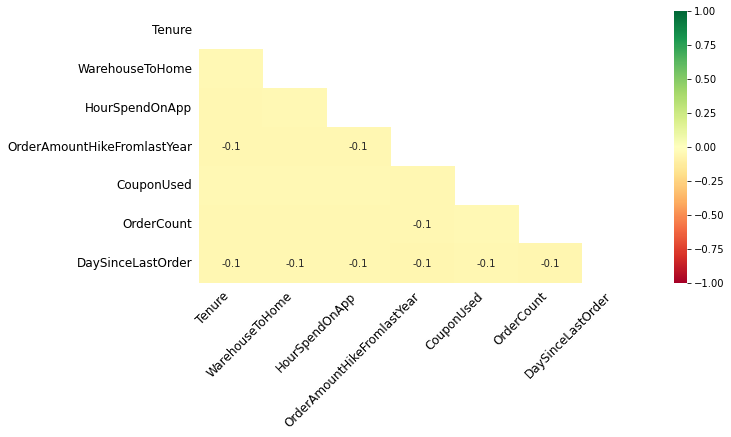

In [ ]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

It can be seen that there is no significant correlation between missing values.

<h4>Imputing Scheme</h4>

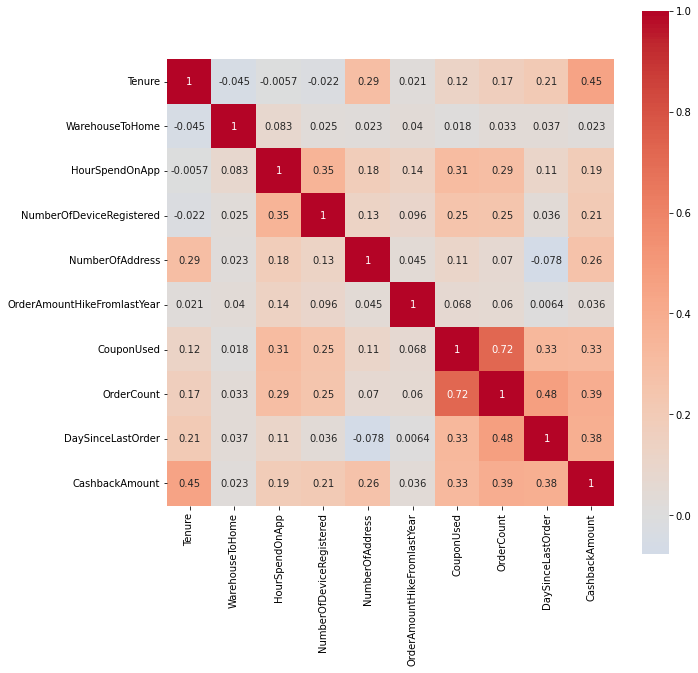

In [ ]:
df_corr = df[num_features].corr('spearman')

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, center=0, square=True, cmap="coolwarm")

- There is a relatively strong correlation between `OrderCount` and `CouponUsed`, these features will be filled using iterative imputer.
- In addition, there are some correlations with intermediate level (assuming intermediate correlation is 0.4 and above or -0.4 and below) but because those correlations are not considered strong enough, it will not be used as reference for iterative imputing.

These features will be filled using iterative imputer:

In [ ]:
iterative_features = ['OrderCount', 'CouponUsed']

The remaining features will be imputed using simple imputer. As for all these numerical features, they can be filled either using median or mean value, depending on the data distribution:

In [ ]:
simple_features = list(set(null_features) - set(iterative_features))
simple_features

['DaySinceLastOrder',
 'Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear']

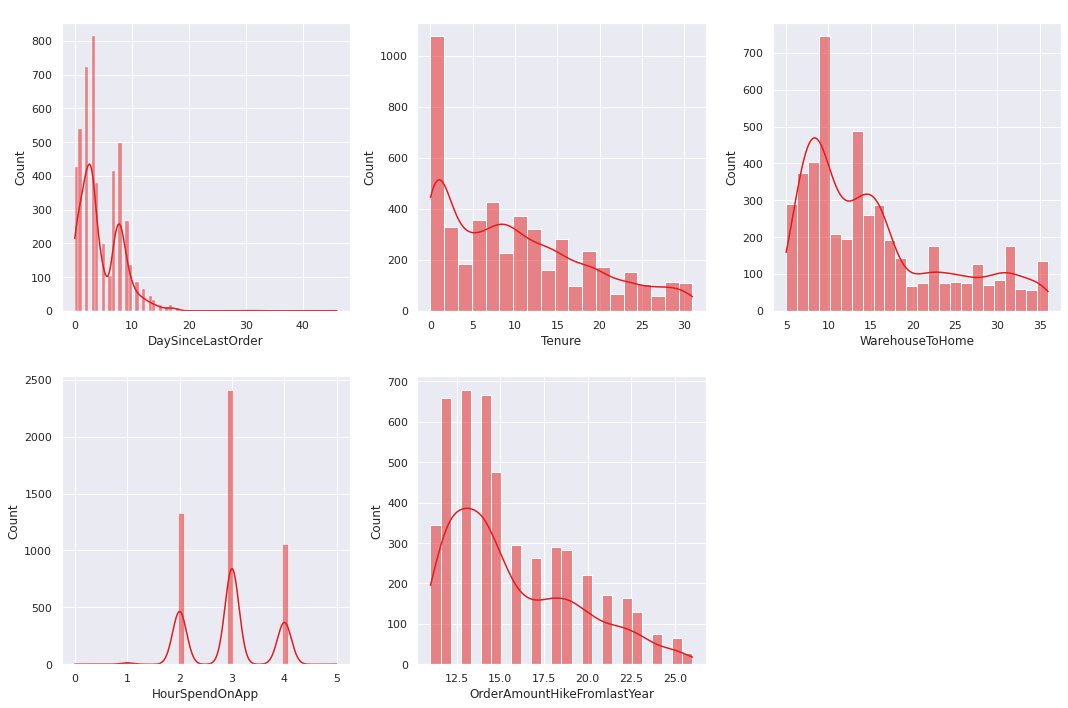

In [ ]:
features = simple_features
plt.figure(figsize=(15, 10))
sns.set(palette='Set1')
plotnumber = 1

for feature in features:
    ax = plt.subplot(2, 3, plotnumber)
    sns.histplot(data=df, x=feature, kde=True)
    plt.xlabel(feature)
    plt.title(' ')    
    plotnumber += 1
    plt.tight_layout()

It can be seen from the graph that there are no features that are normally distributed (no bell-shaped curve).

<h4>Normality test</h4>

In [ ]:
df_normal_test = df.dropna()

def normal_test(feature):

  result = shapiro(df_normal_test[feature])

  normal_stats = result[0]
  p_val = result[1]

  if p_val < 0.05:
      hypothesis = 'Not Normal (Reject H0)'
  else:
      hypothesis = 'Normal (Accept H0)'
  
  result = {'feature': feature,
          'normal_stats': normal_stats,
          'p_val': p_val,
          'hyphotesis': hypothesis}

  return(result)

In [ ]:
list_normal_test = []

for i in simple_features:
  norm_test = normal_test(i)

  list_normal_test.append([norm_test['feature'], norm_test['normal_stats'], norm_test['p_val'], norm_test['hyphotesis']]);

df_normal_test = pd.DataFrame(columns=['feature', 'normal_stats', 'p_val', 'hypothesis'],
                     data=list_normal_test)
df_normal_test

feature  normal_stats         p_val  \
0            DaySinceLastOrder      0.890055  5.465064e-44   
1                       Tenure      0.906713  1.884186e-41   
2              WarehouseToHome      0.887448  2.382207e-44   
3               HourSpendOnApp      0.827627  0.000000e+00   
4  OrderAmountHikeFromlastYear      0.915125  4.998586e-40   

               hypothesis  
0  Not Normal (Reject H0)  
1  Not Normal (Reject H0)  
2  Not Normal (Reject H0)  
3  Not Normal (Reject H0)  
4  Not Normal (Reject H0)

The distributions for all the above features are not normal. So all of the missing values will be filled with their respective median value.

<h4>Comparing HourSpendOnApp by Other Categorical Features</h4>

We also consider the possibility to fill the missing values in `HourSpendOnApp` by the average hour spend by each user characteristic. If there is a significant difference in the mean value between the characteristics, the missing values then can be distinguished based on the features. For this approach, we are looking at `PreferredLoginDevice` and `Gender`.

In [ ]:
df.groupby("PreferredLoginDevice").mean()['HourSpendOnApp']

PreferredLoginDevice
Computer        2.904693
Mobile Phone    2.938533
Name: HourSpendOnApp, dtype: float64

In [ ]:
df.groupby("Gender").mean()['HourSpendOnApp']

Gender
Female    2.946935
Male      2.916695
Name: HourSpendOnApp, dtype: float64

By looking at the numbers, the average hour spent by computer users and mobile phone users, as well as male users and female useres, are more or less the same (~2.9 hours). For validation, we will test out the hypothesis using two independent sample T-test.

In [ ]:
df_ = df.dropna()

device_hourspent = ttest_ind(
              df_[df_['PreferredLoginDevice'] == 'Computer']['HourSpendOnApp'],
              df_[df_['PreferredLoginDevice'] == 'Mobile Phone']['HourSpendOnApp'],
              equal_var = True
            )

gender_hourspent = ttest_ind(
              df_[df_['Gender'] == 'Male']['HourSpendOnApp'],
              df_[df_['Gender'] == 'Female']['HourSpendOnApp'],
              equal_var = True
            )

print('HourSpendOnApp by PreferredLoginDevice:\n', device_hourspent)

if device_hourspent[1] < 0.05:
      print('-> Average HourSpendOnApp by computer users are not the same as mobile phone users (Reject H0)')
else:
      print('-> Average HourSpendOnApp by computer users are the same as mobile phone users (Accept H0)')

print('\nHourSpendOnApp by Gender:\n', gender_hourspent)

if gender_hourspent[1] < 0.05:
      print('-> Average HourSpendOnApp by male users are not the same as female users (Reject H0)')
else:
      print('-> Average HourSpendOnApp by male users are the same as female users (Accept H0)')

HourSpendOnApp by PreferredLoginDevice:
 Ttest_indResult(statistic=-0.422239824952042, pvalue=0.6728767522833506)
-> Average HourSpendOnApp by computer users are the same as mobile phone users (Accept H0)

HourSpendOnApp by Gender:
 Ttest_indResult(statistic=-0.7251660978912244, pvalue=0.46840019015760403)
-> Average HourSpendOnApp by male users are the same as female users (Accept H0)


Based on the test results, the average `HourSpendOnApp' of computer and mobile phone users is the same. The average for male and female users is also the same. So we will stick to the earlier imputing scheme where the missing values will be filled with the median value with no differentiation between user characteristics.

<h4>Imputing Missing Values</h4>

All these missing values will be filled using their respective median values, namely in the `HourSpendOnApp`, `DaySinceLastOrder`, `OrderAmountHikeFromlastYear`, `Tenure`, and `WarehouseToHome` columns.

In [ ]:
median_features = simple_features
median_features

['DaySinceLastOrder',
 'Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear']

In the end, we have features that will be imputed using:
1. iterative imputer, and
2. simple imputer with median value.

In [ ]:
median_imputer = SimpleImputer(strategy='median')
iterative_imputer = IterativeImputer()

In [ ]:
def imputer(df):

    for i in median_features:
        df[i] = median_imputer.fit_transform(df[i].values.reshape(-1, 1))[:,0]

    for i in iterative_features:
        df[i] = iterative_imputer.fit_transform(df[i].values.reshape(-1, 1))[:,0]

    return(df)

In [ ]:
# imputing
df = imputer(df)
df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

After being imputed, there are no more missing values.



### Other Data Analysis

<h4>Customer Behavior Analysis: Looking at The Preferred Order Category</h4>

In [ ]:
for unique_value in df['PreferedOrderCat'].unique():
  print(unique_value)
  print('Avg. DaySinceLastOrder =', round(df[df['PreferedOrderCat'] == unique_value]['DaySinceLastOrder'].mean()))
  print('Avg. CashbackAmount =', round(df[df['PreferedOrderCat'] == unique_value]['CashbackAmount'].mean()))
  print('Total Churn Percentage =', round(float(df[(df['PreferedOrderCat'] == unique_value) & (df['Churn'] == 1)]['Churn'].value_counts().values/len(df))*100, 2), '%\n')

Laptop & Accessory
Avg. DaySinceLastOrder = 5
Avg. CashbackAmount = 168
Total Churn Percentage = 3.83 %

Mobile Phone
Avg. DaySinceLastOrder = 3
Avg. CashbackAmount = 140
Total Churn Percentage = 9.6 %

Others
Avg. DaySinceLastOrder = 7
Avg. CashbackAmount = 305
Total Churn Percentage = 0.38 %

Fashion
Avg. DaySinceLastOrder = 5
Avg. CashbackAmount = 211
Total Churn Percentage = 2.45 %

Grocery
Avg. DaySinceLastOrder = 6
Avg. CashbackAmount = 266
Total Churn Percentage = 0.32 %



## Test Statistic

Statistical tests in this case study were conducted to determine the relationship between variables, especially between *feature* and the target (churn). Several hypothesis tests will be carried out in this study, including _Two Sample Independent T-Test_ for numerical data and _Chi Square_ for categorical data.

### Two-sample T-test

In this study, the _Two Sample Independent T-Test_ determines whether or not there is a difference between the *feature* average and the target average (churn). The feature tested using the _Two Sample Independent T-Test_ is the features that have a numerical data type, including:
`Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder,`CashbackAmount`

**Hypothesis**:
<br>
**Ho**: The average _Feature_ that does not *churn* is the same as the average *features that churn.
<br>
**Ha**: The average _Feature_ that does not *churn* is different from the average *feature* that *churns*.

In [ ]:
# Two sample independent t-test
def t_test_num(feature):

  result = list(ttest_ind(
                df[df['Churn'] == 1][feature],
                df[df['Churn'] == 0][feature],
                equal_var = True
              ))

  t_stats = result[0]
  p_val = result[1]

  if result[1] < 0.05:
      hypothesis = 'Not Equal (Reject H0)'
  else:
      hypothesis = 'Equal (Accept H0)'
  
  result = {'feature': feature,
          't_stats': t_stats,
          'p_val': p_val,
          'hyphotesis': hypothesis}

  return(result)


In [ ]:
list_t_test = []

for i in num_features:
  t_test = t_test_num(i)

  list_t_test.append([t_test['feature'], t_test['t_stats'], t_test['p_val'], t_test['hyphotesis']]);

df_ttest = pd.DataFrame(columns=['feature', 't_stats', 'p_val', 'hypothesis'],
                     data=list_t_test)
df_ttest

feature    t_stats          p_val  \
0                       Tenure -25.154585  1.144335e-131   
1              WarehouseToHome   4.988401   6.291730e-07   
2               HourSpendOnApp   1.015035   3.101378e-01   
3     NumberOfDeviceRegistered   8.363530   7.786531e-17   
4              NumberOfAddress   3.470546   5.237371e-04   
5  OrderAmountHikeFromlastYear  -1.511510   1.307211e-01   
6                   CouponUsed  -0.192087   8.476819e-01   
7                   OrderCount  -1.542998   1.228937e-01   
8            DaySinceLastOrder -10.587844   6.323712e-26   
9               CashbackAmount -10.246951   2.111219e-24   

              hypothesis  
0  Not Equal (Reject H0)  
1  Not Equal (Reject H0)  
2      Equal (Accept H0)  
3  Not Equal (Reject H0)  
4  Not Equal (Reject H0)  
5      Equal (Accept H0)  
6      Equal (Accept H0)  
7      Equal (Accept H0)  
8  Not Equal (Reject H0)  
9  Not Equal (Reject H0)

**Conclusion**:
The P-Value is lower than the significance level (0.05), meaning we have enough evidence to reject the Zero Hypothesis. Therefore, based on the table of statistical analysis results above, it can be seen that the numerical _feature_ which has a different average between those who *churn* and those who do not *churn*, including `Tenure`, `WarehouseToHome`, `NumberOfDeviceRegistered`, ` NumberOfAddress`, `DaySinceLastOrder`, and `CashbackAmount` for rejecting the Null Hypothesis.

### Chi-squared Test

_Chi-Square_ statistical test in this case study to determine the relationship between _feature_ and categorical data types, including `PreferredLoginDevice`, `CityTier`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat`, `SatisfactionScore`, `MaritalStatus`, `Complain ` with the target, which is `Churn`.



**Hypothesis**:
<br>
**Ho**: _Feature_ does not affect the target (*churn*)
<br>
**Ha**: _Feature_ affects targets (*churn*)

In [ ]:
def chi_square_cat(feature):
  
  df_feature = df[feature]

  not_churn = []
  churn = []

  for i in df_feature.unique():
      not_churn.append(len(df[(df_feature == i) & (df['Churn'] == 0)]))
      churn.append(len(df[(df_feature == i) & (df['Churn'] == 1)]))

  data = [not_churn, churn]

  chi_stats, p_val, dof, expected = chi2_contingency(data)
  alpha = 0.05

  if p_val <= alpha:
      hypothesis = 'Dependent (Reject H0)'
  else:
      hypothesis = 'Independent (Accept H0)'

  result = {'feature': feature,
          'data': data,
          'chi_stats': chi_stats,
          'p_val': p_val,
          'hyphotesis': hypothesis}

  return(result)  

In [ ]:
list_chi_square = []

for i in cat_features:
  chi_square = chi_square_cat(i)

  list_chi_square.append([chi_square['feature'], chi_square['chi_stats'], chi_square['p_val'], chi_square['hyphotesis']]);

df_chi_square = pd.DataFrame(columns=['feature', 'chi_stats', 'p_val', 'hypothesis'],
                     data=list_chi_square)
df_chi_square

feature   chi_stats         p_val             hypothesis
0  PreferredLoginDevice   12.385324  4.327215e-04  Dependent (Reject H0)
1              CityTier   49.952380  1.422259e-11  Dependent (Reject H0)
2  PreferredPaymentMode   49.755702  4.060830e-10  Dependent (Reject H0)
3                Gender    3.973949  4.620927e-02  Dependent (Reject H0)
4      PreferedOrderCat  226.426179  7.760609e-48  Dependent (Reject H0)
5     SatisfactionScore   57.479912  9.811513e-12  Dependent (Reject H0)
6         MaritalStatus  169.697011  1.415019e-37  Dependent (Reject H0)
7              Complain  309.645877  2.608364e-69  Dependent (Reject H0)

**Conclusion**:
The P-Value is lower than the significance level (0.05), meaning we have enough evidence to reject the Zero Hypothesis. Therefore, based on the table of statistical analysis results above, it can be seen that all features with categorical data types have a relationship with the target.

## Exploratory Data Analysis

In [ ]:
print('Jumlah Target:')

Jumlah Target:


Proporsi Target:


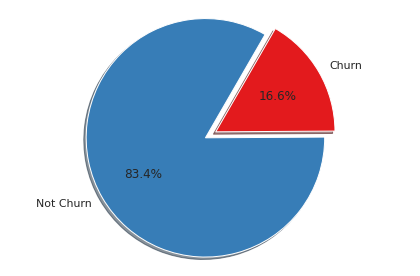

In [ ]:
# Pie chart
print('Proporsi Target:')

labels = ['Not Churn', 'Churn']

explode = (0, 0.1)  
fig1, ax = plt.subplots()

colors = ['#377db7','#e31a1d']

ax.pie(df['Churn'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60, colors=colors)

ax.axis('equal')  
plt.tight_layout()
plt.show()

The proportion of the percentage of class 0 (not churn) is 83.16% and the percentage of class 1 (churn) is 16.84%.

### EDA: Categorical Features

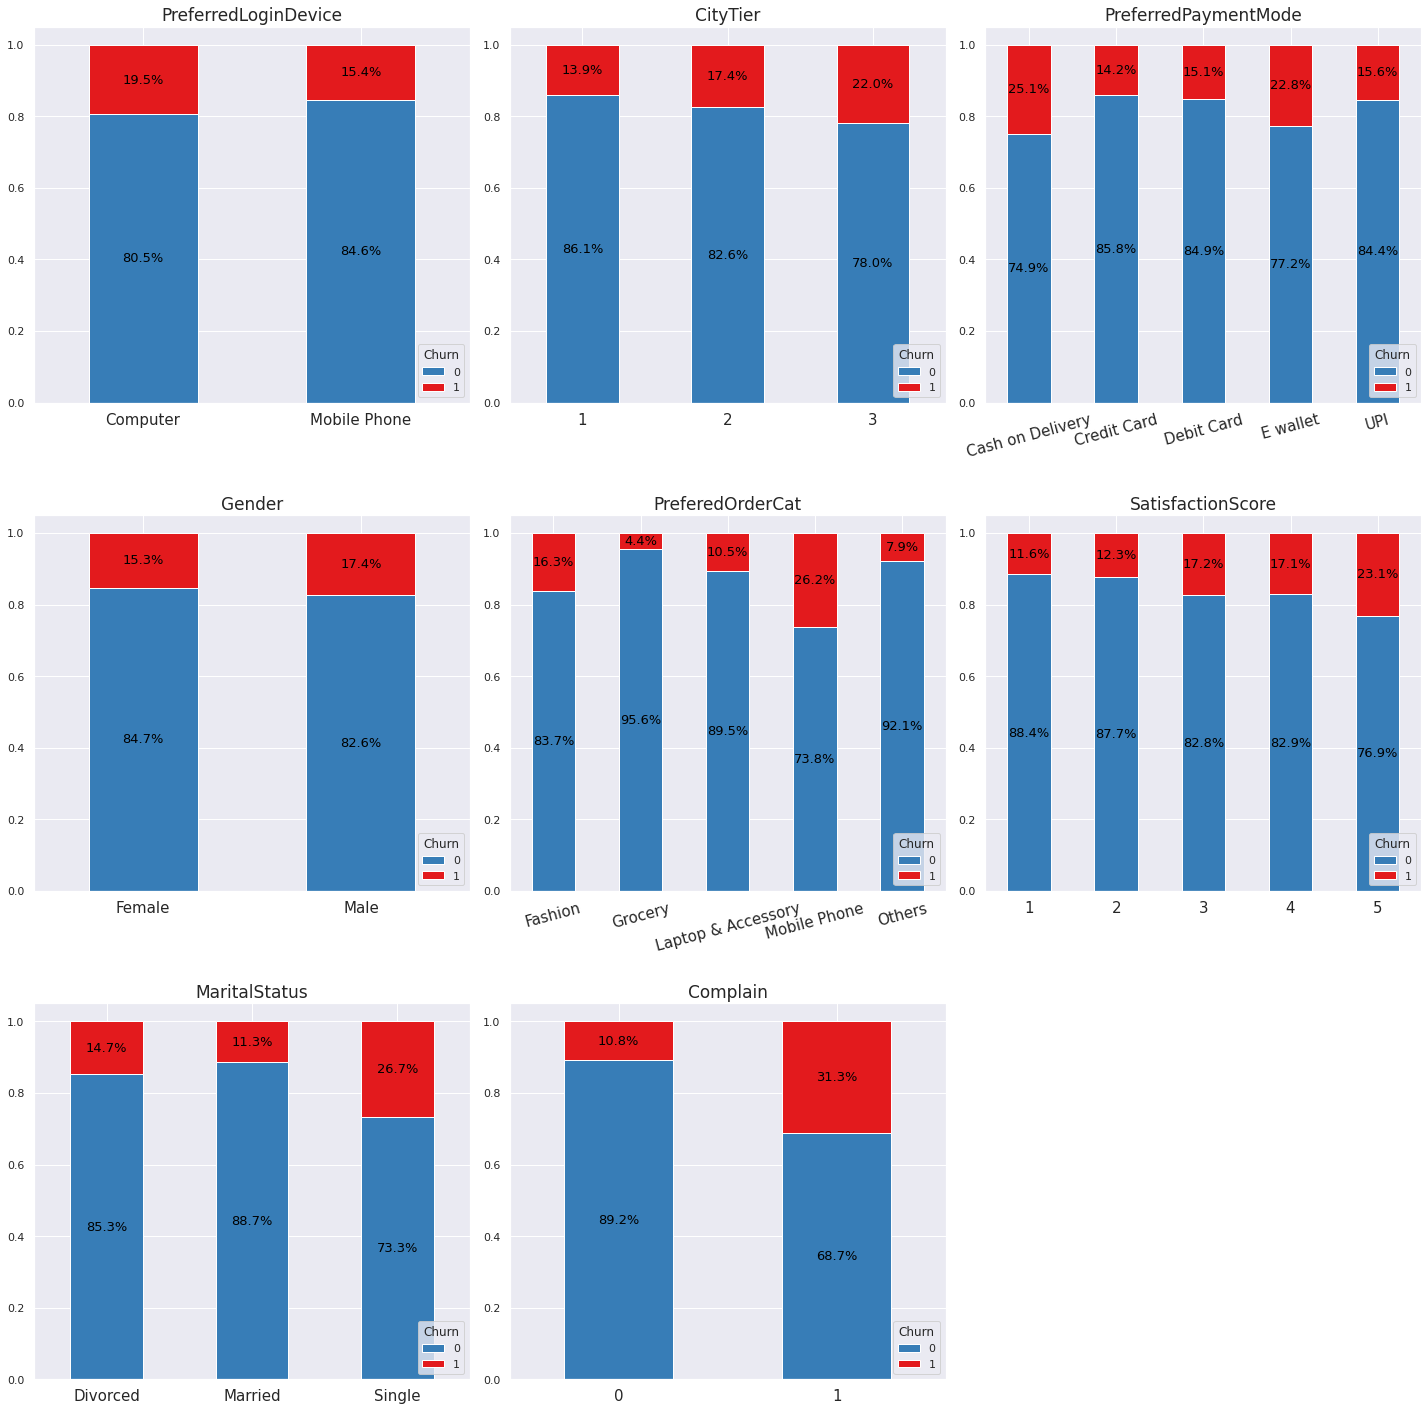

In [ ]:
features = cat_features
sns.set(palette='Set1')
fig = plt.figure(figsize=(20,20))
count = 0

for feature in features:
    count +=1
    ax= plt.subplot(3,3,count)    

    df_crosstab = pd.crosstab(index=df[feature], columns=df['Churn'])
    df_crosstab_percent = pd.crosstab(index=df[feature], columns=df['Churn'], normalize='index')

    df_crosstab_percent.plot(kind='bar', stacked=True, ax=ax, color=['#377db7','#e31a1d'])

    plt.legend(loc='lower right', title='Churn')
    plt.xlabel(' ')
    plt.title(feature, fontsize=17)

    unique_values = (df[feature].astype(str).unique())
    rotation  = 0

    for i in unique_values:
      if len(i) > 15:
        rotation = 15
        break

    plt.xticks(rotation=rotation, fontsize=15)

    for n, x in enumerate([*df_crosstab.index.values]):
      for (proportion, y_loc) in zip(df_crosstab_percent.loc[x], df_crosstab_percent.loc[x].cumsum()):
                  
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', color="black",
                 fontsize=13, va = 'center', ha = 'center')
    
    fig.tight_layout()

plt.show()


Based on the barplot above, it can be concluded several things:

1. Customers whose `PreferredLoginDevice` feature is Computer are more likely to churn than customers who use Mobile Phones.<br>
2. Customers with tier 3 in `CityTier` are more likely to churn than customers who live in other tier.<br>
3. Customers whose `PreferredPaymentMode` feature is Cash on Delivery are more likely to churn than those using other payment methods.<br>
4. Customers whose `Gender` is Male are more likely to churn than female customers.<br>
5. Customers whose `PreferredOrderCat` feature is Mobile Phone are more likely to churn than other PreferredOrderCat features.<br>
6. Customers who gave 5 for `Satisfaction Score` are more likely to churn than other customers.<br>
7. Customers whose `MaritalStatus` is Single are more likely to churn than other customers.<br>
8. Customers whose `Complain` feature is 1 (have complained) are more likely to churn than customers who have never complained.

### EDA: Numerical Features

In [ ]:
# binning numerical features

bin_points = [[0,2,12], [5,10,18], [0,3,4], [1,4,5], [1,2,4,6], [11,12,16], [0,3], [1,3], [1,4,7], [0,125,170]]

bin_labels = [['0-1 month', '2-11 months', '≥ 12 months'],
              ['5-9 km', '10-17 km', '≥ 18 km'],
              ['0-2 hours', '3 hours', '≥ 4 hours'],
              ['1-3', '4', '≥ 5'],
              ['1', '2-3', '4-5','≥ 6'],
              ['≤ 11%', '12-15%', '≥ 16%'],
              ['0-2', '≥ 3'],
              ['1-2', '≥ 3'],
              ['1-3 days', '4-6 days', '≥ 7 days'],
              ['0-124 INR', '125-169 INR', '≥ 170 INR']]

bin_list = []
cat_list = []

bins = bin_points
for i in range(len(bins)):
  bins[i].pop(0)
  bins[i] = [-np.inf] + (list(np.array(bins[i]) - 1) + [np.inf])

for i in range(len(num_features)):
  bin_list.append({
    'feature': num_features[i],
    'bins': bins[i],
    'labels': bin_labels[i]
    })
  
df_bin = pd.DataFrame(bin_list)

for i in range(len(df_bin)):
  cat_list.append(pd.cut(df[df_bin['feature'][i]], bins=df_bin['bins'][i], labels=df_bin['labels'][i]))

df_bin['cat_array'] = cat_list

df_bin

feature                   bins  \
0                       Tenure     [-inf, 1, 11, inf]   
1              WarehouseToHome     [-inf, 9, 17, inf]   
2               HourSpendOnApp      [-inf, 2, 3, inf]   
3     NumberOfDeviceRegistered      [-inf, 3, 4, inf]   
4              NumberOfAddress   [-inf, 1, 3, 5, inf]   
5  OrderAmountHikeFromlastYear    [-inf, 11, 15, inf]   
6                   CouponUsed         [-inf, 2, inf]   
7                   OrderCount         [-inf, 2, inf]   
8            DaySinceLastOrder      [-inf, 3, 6, inf]   
9               CashbackAmount  [-inf, 124, 169, inf]   

                                  labels  \
0  [0-1 month, 2-11 months, ≥ 12 months]   
1            [5-9 km, 10-17 km, ≥ 18 km]   
2        [0-2 hours, 3 hours, ≥ 4 hours]   
3                          [1-3, 4, ≥ 5]   
4                     [1, 2-3, 4-5, ≥ 6]   
5                 [≤ 11%, 12-15%, ≥ 16%]   
6                             [0-2, ≥ 3]   
7                             [1-2, ≥ 3]   
8         [1-3 days, 4-6 days, ≥ 7 days]   
9    [0-124 INR, 125-169 INR, ≥ 170 INR]   

                                           cat_array  
0  0       2-11 months
1       2-11 months
2     ...  
1  0         5-9 km
1         5-9 km
2        ≥ 1...  
2  0         3 hours
1         3 hours
2       0-...  
3  0       1-3
1         4
2         4
3         ...  
4  0       ≥ 6
1       ≥ 6
2       ≥ 6
3       ≥ ...  
5  0        ≤ 11%
1       12-15%
2       12-15%
3...  
6  0       0-2
1       0-2
2       0-2
3       0-...  
7  0       1-2
1       1-2
2       1-2
3       1-...  
8  0       4-6 days
1       1-3 days
2       1-3 ...  
9  0       125-169 INR
1         0-124 INR
2     ...

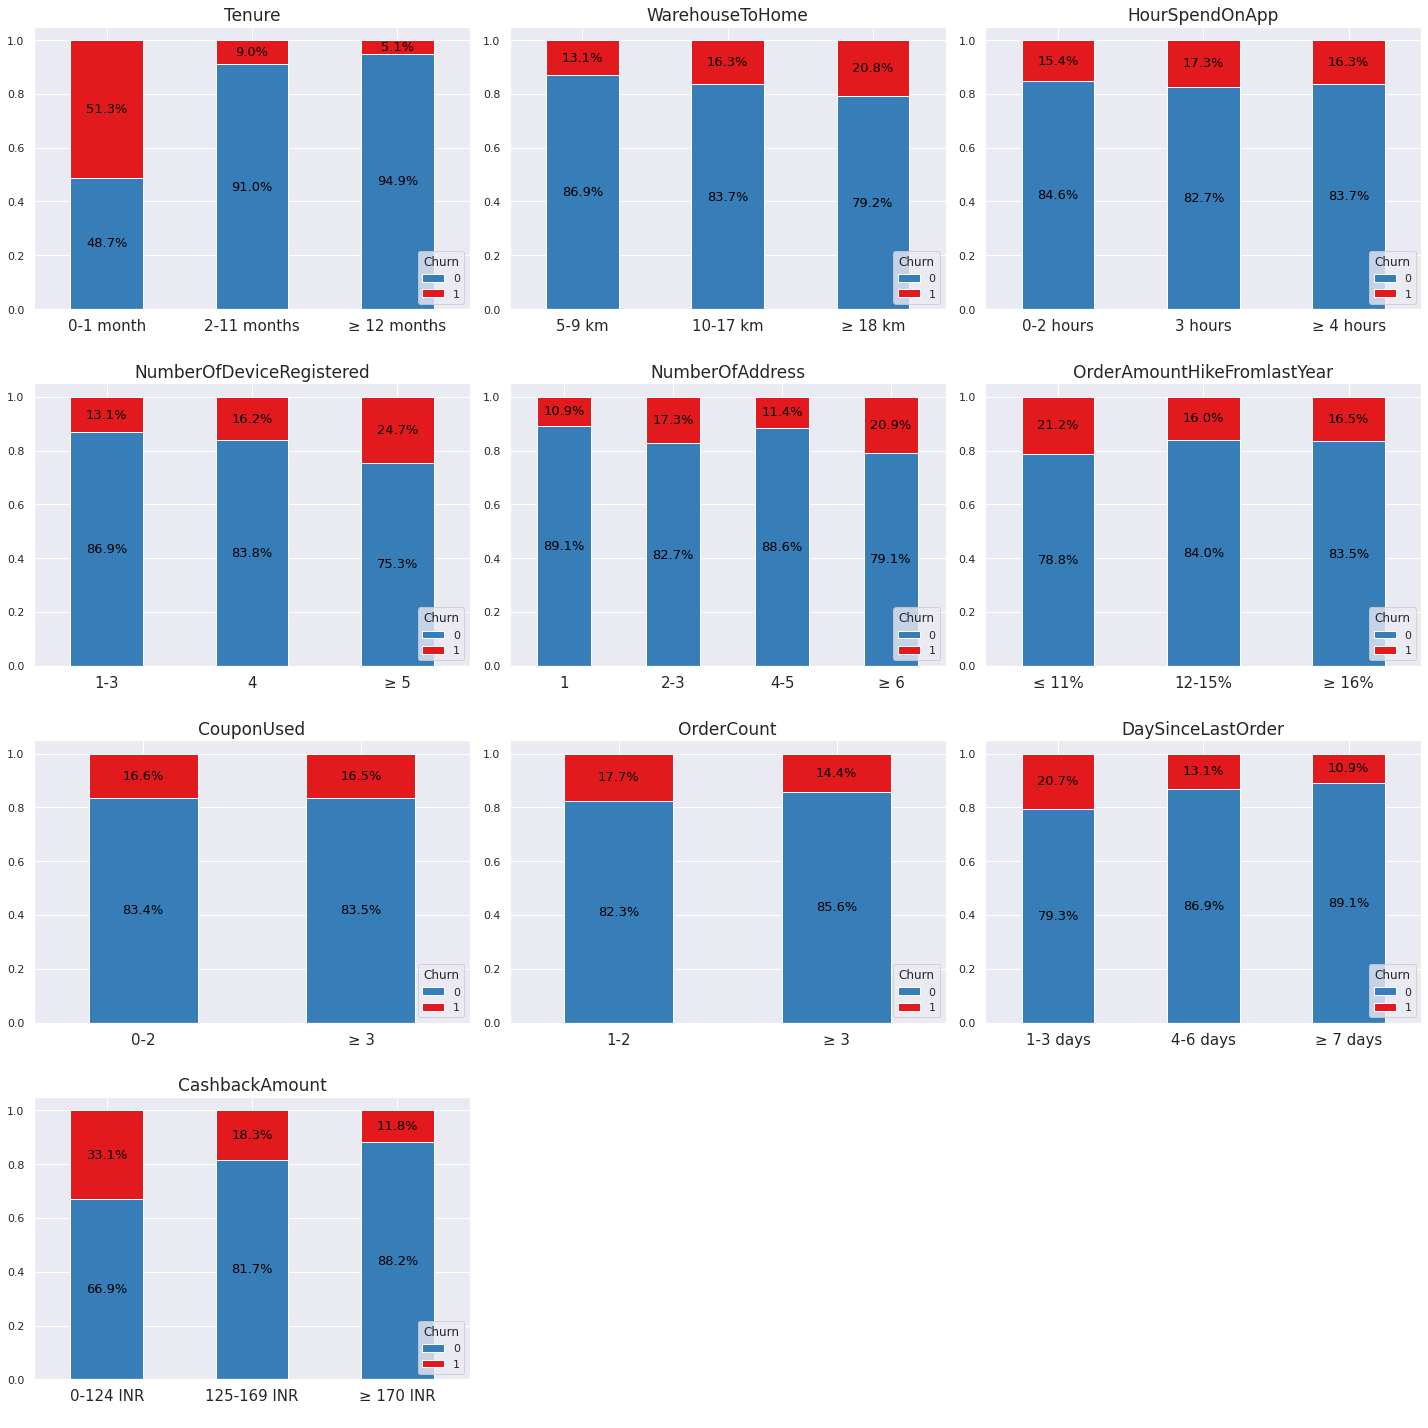

In [ ]:
sns.set(palette='Set1')
fig = plt.figure(figsize=(20,20))
count = 0

for i in range(len(df_bin)):
    count +=1
    ax= plt.subplot(4,3,count)    

    feature = df_bin['feature'][i]
    cat_array = df_bin['cat_array'][i]

    df_crosstab = pd.crosstab(index=cat_array, columns=df['Churn'])
    df_crosstab_percent = pd.crosstab(index=cat_array, columns=df['Churn'], normalize='index')

    df_crosstab_percent.plot(kind='bar', stacked=True, ax=ax, color=['#377db7','#e31a1d'])

    plt.legend(loc='lower right', title='Churn')
    plt.xlabel(' ')
    plt.title(feature, fontsize=17)
    plt.xticks(rotation = 0, fontsize=15)

    for n, x in enumerate([*df_crosstab.index.values]):
      for (proportion, y_loc) in zip(df_crosstab_percent.loc[x], df_crosstab_percent.loc[x].cumsum()):
                  
          plt.text(x=n, y=(y_loc - proportion) + (proportion / 2),
                  s=f'{np.round(proportion * 100, 1)}%', color="black",
                  fontsize=13, va = 'center', ha = 'center')
    
    fig.tight_layout()

plt.show()


Based on the barplot above, we can conclude several things:

1. Based on the `Tenure` feature, customers tend to churn when they use the application for the first 0 to 1 month.<br>
2. Based on the `WarehouseToHome` feature, customers tend to churn when the distance from their house to the close warehouse is more than 8 km.<br>
3. Based on the `HourSpendOnApp` feature, customers who tend to churn are customers who use the application for 3 hours daily.<br>
4. Based on the `NumberOfDeviceRegistered` feature, customers who tend to churn are customers with more than 5 registered devices.<br>
5. Based on the `NumberOfAddress` feature, customers with more than 6 addresses tend to churn compared to others.<br>
6. Based on the `OrderAmountHikeFromlastYear` feature, customers whose order percentage increase is less than 11% are more likely to churn.<br>
7. Based on the `CouponUsed` feature, the difference in the number of coupons used does not indicate a tendency for customer churn.<br>
8. Based on the `OrderCount` feature, customers who tend to churn are customers with 1-2 orders.<br>
9. Based on the `DaySinceLastOrder` feature, customers who last ordered 1-3 days are more likely to churn than other customers.<br>
10. Based on the `CashbackAmount` feature, customers with cashback amounts between 0-124 INR are more likely to churn than customers with larger cashback amounts.

## Data Splitting

In [ ]:
X = df.drop(columns = 'Churn')
y = df['Churn']

All the columns will be learning features except for `Churn`, because `Churn` will be the classification target.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 193340
    )

The data is divided into 80% train set and 20% test set.

## Data Preprocessing

<h3>Encoding Scheme</h3>

In this *encoding* section, we define non-numeric features, namely *features* with data types other than *integer*, and *float* which needs to be encoded into numeric so that they can be used in the *modelling* stage, then see *unique value* on the feature to be _encoding_ to determine the proper _encoding_ scheme:

In [ ]:
encode_features = [feature for feature in df.columns if ((df[feature].dtypes == 'O'))]
df[encode_features].nunique()

PreferredLoginDevice    2
PreferredPaymentMode    5
Gender                  2
PreferedOrderCat        5
MaritalStatus           3
dtype: int64

The number of *unique values* for each of these *features* is not too much, so we use* one-hot encoder for the *encoding* process

In [ ]:
one_hot_features = encode_features

<h3>Defining The Column Transformer</h3>

Transformation is executed on all *features* categories using *one-hot encoder*.

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), one_hot_features)
],  remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['PreferredLoginDevice',
                                  'PreferredPaymentMode', 'Gender',
                                  'PreferedOrderCat', 'MaritalStatus'])])

In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

0    1    2    3    4    5    6    7    8    9   ...   15   16   17  \
0     0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  3.0  3.0  1.0   
1     1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  2.0  4.0  4.0   
2     1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  3.0  3.0  1.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  2.0  4.0  3.0   
4     1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  3.0  4.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4046  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  2.0  4.0  3.0   
4047  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  4.0  4.0  5.0   
4048  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  3.0  5.0  5.0   
4049  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  3.0  4.0  1.0   
4050  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  2.0  3.0  2.0   

       18   19    20   21        22    23     24  
0     8.0  0.0  20.0  1.0  1.000000   2.0  123.0  
1     5.0  1.0  20.0  1.0  2.000000   2.0  123.0  
2     4.0  0.0  14.0  0.0  1.000000   0.0  202.0  
3     3.0  1.0  19.0  2.0  3.096453  12.0  240.0  
4     3.0  1.0  12.0  2.0  2.000000  10.0  177.0  
...   ...  ...   ...  ...       ...   ...    ...  
4046  5.0  1.0  20.0  1.0  1.000000   3.0  230.0  
4047  3.0  0.0  14.0  5.0  6.000000  12.0  261.0  
4048  6.0  0.0  26.0  1.0  2.000000   3.0  173.0  
4049  5.0  0.0  15.0  1.0  2.000000   1.0  146.0  
4050  2.0  1.0  17.0  1.0  1.000000   7.0  142.0  

[4051 rows x 25 columns]

The transformation process produces 23 *features* (0 to 22), which will be used for modelling.

## Model Benchmarking


We will train several benchmark models, including Logistic Regression, K-nearest Neighbors, Decision Tree, Random Forest, Adaboost, Gradient Boost, XG Boost, and Light Gradient Boosting Machine (LGBM). The training process uses cross-validation to avoid data leakage. Model with best result will then be tested for it's performance on test set.

In [ ]:
# Defining Benchmark Models

logreg = LogisticRegression(random_state=2022)

knn = KNeighborsClassifier()

tree = DecisionTreeClassifier(random_state=2022)

rf = RandomForestClassifier(random_state=2022)

ada = AdaBoostClassifier(tree, random_state=2022)

gbc = GradientBoostingClassifier(random_state=2022)

xgbc = XGBClassifier(random_state=2022, verbosity=0)

lgbm = LGBMClassifier(random_state=2022)

In [ ]:
# Cross-validation on benchmark models

models = [logreg,knn,tree,rf,ada,gbc,xgbc,lgbm]
skfold = StratifiedKFold(n_splits=10)
score=[]
mean_values=[]
std_values=[]

for i in models:
   
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='f1',
        error_score='raise'
        )
    
    print(model_cv)

    score.append(model_cv)
    mean_values.append(model_cv.mean())
    std_values.append(model_cv.std())

[0.62962963 0.60344828 0.54237288 0.60714286 0.56074766 0.625
 0.52830189 0.6984127  0.55769231 0.56140351]
[0.58181818 0.44247788 0.3853211  0.47619048 0.38461538 0.5045045
 0.46153846 0.5        0.48598131 0.44642857]
[0.84210526 0.80291971 0.8        0.82089552 0.82014388 0.80597015
 0.8358209  0.84671533 0.86567164 0.8030303 ]
[0.88709677 0.848      0.82352941 0.848      0.81967213 0.85714286
 0.87603306 0.91472868 0.89256198 0.86885246]
[0.85074627 0.8057554  0.77777778 0.81203008 0.84671533 0.82442748
 0.82706767 0.85294118 0.83076923 0.83211679]
[0.75213675 0.688      0.66666667 0.72566372 0.72881356 0.73333333
 0.64864865 0.784      0.75       0.67768595]
[0.71929825 0.66129032 0.58181818 0.67857143 0.67241379 0.70689655
 0.63551402 0.76422764 0.72222222 0.63793103]
[0.90625    0.86567164 0.8503937  0.83606557 0.875      0.86614173
 0.8976378  0.890625   0.87603306 0.86363636]


In [ ]:
# Show cross-validation result

train_score = []

df_cv = pd.DataFrame({
    'model':['logreg','knn','tree','rf','ada','gbc','xgbc','lgbm'],
    'mean':mean_values,
    'std':std_values
}).sort_values(by='mean', ascending=False).reset_index(drop=True)

chosen_model = df_cv.head(2)['model'].values
train_score = df_cv.head(2)['mean'].values

df_cv

model      mean       std
0    lgbm  0.872745  0.020247
1      rf  0.863562  0.028724
2     ada  0.826035  0.021821
3    tree  0.824327  0.021281
4     gbc  0.715495  0.041065
5    xgbc  0.678018  0.049904
6  logreg  0.591415  0.048781
7     knn  0.466888  0.055350

From the results above, it can be seen that LGBM (Light Gradient Boosting Machine) and RF (Random Forest) have the best F1-score compared to the other models. Next, these 2 models will be tested for their performance on test set.

## Testing Model on Test Set

Model testing were carried out on 20% of the total data.

In [ ]:
# Test on best models
test_score = []

models={
    'rf': RandomForestClassifier(random_state=2022),
    'lgbm': LGBMClassifier(random_state=2022)
}

score=[]

for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('model', models[i])
    ])

    # fitting
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    # roc_auc score
    score.append([f1_score(y_test, y_pred)])

score_before_tuning = pd.DataFrame(score, columns=['F1 score'], index = models.keys())

for i in chosen_model:
  test_score.append(score_before_tuning.loc[i].values[0])

In [ ]:
df_before_tuning = pd.DataFrame({
    'train_score': train_score,
    'test_score': test_score
}, index=chosen_model)

df_before_tuning

train_score  test_score
lgbm     0.872745    0.881250
rf       0.863562    0.876972

After the model is tested on the test dataset, it can be seen that the F1-scores for the LGBM (Light Gradient Boosted Machine) are slightly higher than the RF (Random Forest) ones. Both models will be chosen for further hyperparameter tuning.

## Hyperparameter Tuning

In [ ]:
tuned_model = []
tuned_train_score = []
tuned_test_score = []

### LGBM

In [ ]:
lgbm_estimator = Pipeline([('transformer', transformer),
                           ('model', lgbm)])

lgbm_hyperparam_space=[{
    'model__max_bin': [25, 50, 100, 125, 175, 255, 250],
    'model__num_leaves':[15, 30, 45, 60, 75, 100, 125],
    'model__min_data_in_leaf': [15, 30, 45, 60, 75, 100, 125],
    'model__num_iterations':[10, 25, 50, 75, 100, 150, 200],
    'model__learning_rate': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.15, 0.2]
}]

lgbm_random_search = RandomizedSearchCV(
    lgbm_estimator,
    lgbm_hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1,
    n_iter = 100,
    random_state = 2022
)

# fit
lgbm_random_search.fit(X_train, y_train)
tuned_model.append('tuned lgbm')
tuned_train_score.append(lgbm_random_search.best_score_)
print('Model: LGBM')
print('Best Hyperparameters:',lgbm_random_search.best_params_)
print('\nTrain Score:',lgbm_random_search.best_score_)

Model: LGBM
Best Hyperparameters: {'model__num_leaves': 45, 'model__num_iterations': 200, 'model__min_data_in_leaf': 15, 'model__max_bin': 125, 'model__learning_rate': 0.2}

Train Score: 0.9147497290584223


The *train score* for LGBM after *tuning* with the F1-score metric increased from 0.87 to 0.91.

In [ ]:
lgbm_tuning = lgbm_random_search.best_estimator_
lgbm_tuning.fit(X_train, y_train)
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

# f1 score
f1_lgbm_tuning = f1_score(y_test, y_pred_lgbm_tuning)
tuned_test_score.append(f1_lgbm_tuning)

print('Test Score:',f1_lgbm_tuning)

Test Score: 0.9074626865671641


The test score for LGBM after *tuning* with the F1-score metric increased from 0.86 to 0.90.

### Random Forest

In [ ]:
rf_estimator = Pipeline([('transformer', transformer),
                         ('model', rf)])

rf_hyperparam_space = {
    'model__n_estimators': [5,20,50,100],
    'model__criterion' : ['gini','entropy'],
    'model__max_features': ['auto', 'sqrt'],
    'model__max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
    'model__min_samples_split': [2, 6, 10],
    'model__min_samples_leaf': [1, 3, 4],
    'model__bootstrap': [True, False]
    }

rf_random_search = RandomizedSearchCV(
    rf_estimator,
    rf_hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1,
    n_iter = 100,
    random_state = 2022
)

# fit
rf_random_search.fit(X_train, y_train)
tuned_model.append('tuned rf')
tuned_train_score.append(rf_random_search.best_score_)
print('Model: Random Forest')
print('Best Hyperparameters:',rf_random_search.best_params_)
print('\nTrain Score:',rf_random_search.best_score_)

Model: Random Forest
Best Hyperparameters: {'model__n_estimators': 20, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 50, 'model__criterion': 'entropy', 'model__bootstrap': False}

Train Score: 0.8899989217164226


The train score for Random Forest after *tuning* with the F1-score metric increased from 0.89 to 0.86.

In [ ]:
rf_tuning = rf_random_search.best_estimator_
rf_tuning.fit(X_train, y_train)
y_pred_rf_tuning = rf_tuning.predict(X_test)

# f1 score
f1_rf_tuning = f1_score(y_test, y_pred_rf_tuning)
tuned_test_score.append(f1_rf_tuning)

print('Test Score:',f1_rf_tuning)

Test Score: 0.8990825688073395


The *test score* for Random Forest after *tuning* with the F1-score metric increased from 0.87 to 0.89.

### Best Model: LGBM

In [ ]:
df_after_tuning = pd.DataFrame({
    'train_score': tuned_train_score,
    'test_score': tuned_test_score
}, index=tuned_model)

df_after_tuning

train_score  test_score
tuned lgbm     0.914750    0.907463
tuned rf       0.889999    0.899083

Based on the F1-score result table above, the best *test score* was obtained on the LGBM model with **0.901493**.  After being *tuned*, the LGBM model becomes the best model for this *project*.

<h4>Saving Model</h4>

In [ ]:
best_model = lgbm_random_search.best_estimator_
best_model.fit(X_train, y_train)

filename = 'Churn Prediction Model.sav'
pickle.dump(best_model, open(filename,'wb'))

## Best Model Result

### Confusion Matrix

Text(27.5, 0.5, 'Actual')

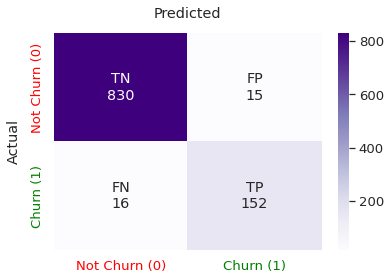

In [ ]:
cm_test_lgbm = confusion_matrix(y_test, y_pred_lgbm_tuning)

top_left = f'TN\n{cm_test_lgbm[0,0]}'
top_right = f'FP\n{cm_test_lgbm[0,1]}'
bottom_left = f'FN\n{cm_test_lgbm[1,0]}'
bottom_right = f'TP\n{cm_test_lgbm[1,1]}'

cm_labels = np.array([[top_left,top_right], [bottom_left,bottom_right]])

sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lgbm, annot = cm_labels, fmt = '', cmap='Purples')

plt.gca().get_xticklabels()[0].set_color('red')
plt.gca().get_xticklabels()[1].set_color('green')
plt.xticks(np.arange(0.5, 2, step=1), ['Not Churn (0)', 'Churn (1)'])

plt.gca().get_yticklabels()[0].set_color('red')
plt.gca().get_yticklabels()[1].set_color('green')
plt.yticks(np.arange(0.5, 2, step=1), ['Not Churn (0)', 'Churn (1)'])

plt.title('Predicted', pad=15)
plt.ylabel('Actual', labelpad=10)

True Positive (TP): There are 151 churn customers that are correctly predicted as churn<br>
True Negative (TN): There are 829 non-churn customers that are correctly predicted as not churn<br>
False Positive(FP): There are 16 prediction errors that the non-churn customers were predicted as churn<br>
False Negative (FN): There were 17 prediction errors that the churn customers were predicted as not churn

### Feature Importance

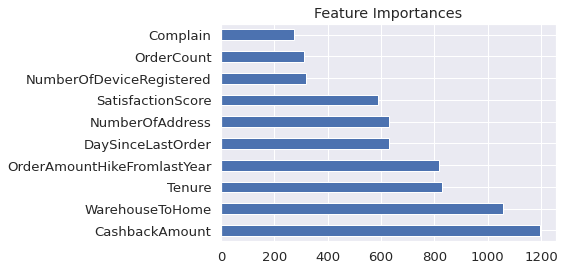

In [ ]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

It can be seen that to make classification using the LGBM model, the features used do not have much difference based on the value of feature importance. The `WarehouseToHome` feature is the most important, followed by `CashbackAmout`, `OrderAmountHikeFromlastYear`, and so on.

## Conclusion and Recommendation

In [ ]:
print('Classification Report Tuned LGBM : \n', classification_report(y_test, y_pred_lgbm_tuning))

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       845
           1       0.91      0.90      0.91       168

    accuracy                           0.97      1013
   macro avg       0.95      0.94      0.94      1013
weighted avg       0.97      0.97      0.97      1013



In [ ]:
print('Classification Report Tuned LGBM : \n', f1_score(y_test, y_pred_lgbm_tuning, average='binary', labels=[1]))

Classification Report Tuned LGBM : 
 0.9074626865671641


<p align='justify'>
&emsp;&emsp;Based on the confusion matrix and classification report, we can conclude that the model is able to correctly predict about 98.2% (recall of class 0 (specificity)) of the customers who are not churned, so the company don't need to target vouchers to those customers. The model also get around 90.5% (recall of class 1) of churned customers correctly, whom will be the targets of the vouchers promotion.</p>

<p align='justify'>
&emsp;&emsp;The model has precision score on churn target of 91% (precision of class 1), which means the model will predict churn correctly approximately 91% of the time. And there also customers who are not churned but predicted as churned at around 1.8% (1 - recall 0 (false positive rate)) of the total customers.</p>

<p align='justify'>
&emsp;&emsp;If the cost for the promo in the form of voucher per customer is 190 INR (assuming the voucher amount is based on the average `CashbackAmount` of customers who do not churn), and the potential loss for each churned customer is 1000 INR, and the total number of customers is 1013 customers (of which 845 customers do not churn, and 168 others go churn), then the cost calculation is as follows:</p>

Without Model Prediction (all customers get vouchers) :
- Total Customers = 1013 (Not Churn = 845; Churn = 168)
- Total Promo Cost =>  1013 x 190 = 192.470
- Total churned customers, receiving promo => 168 customers (because the promotion given to all of them with no exception)
- Total churned customers, not receiving promo  => 0 customers (all of them got promo)
- Unnecessary promo cost => 845 x 190 INR = 160.550 (because 845 non churned customers were given vouchers anyway)
- Amount of savings => 0 INR

Using Model Prediction (only predicted churned customers get vouchers) :
- Number of customers correctly predicted as churn => 168(churn) x 90.5%(recall 1) = 152
- Number of customers predicted as churn, but actually not churn  => 845(not churn) x 1.8%(false positive rate) = 15
- Total Promo Cost => company investment to churn customers = (152 x 190 INR) + (16 x 190 INR) = 28.880 INR + 2.850 INR = 31.730 INR
- Total churned customers, receiving promo => 152 orang (recall 1 = 90.5%)
- Total churned customers, not receiving promo => 16 orang (false negative rate = 9.5%)
- Unnecessary promo cost (non churned customers still given vouchers) => 15 x 190 INR = 2.850 INR
- Number of customers correctly predicted as not churn => 845 x 98.2%(recall 0) = 830
- Amount of promo savings => 830 x 190 INR = 157.700 INR (only those who don't churn got promo)
- Loss caused by customer churns (because they were not given promo to prevent them churn)  => 16 x 1000 INR = 16.000 INR
- Total Cost => 31.730 (promo cost) + 16.000 (loss from churned customers) = 47.730

<p align='justify'>
&emsp;&emsp;Based on the calculation, it can be seen that by using the model, the company will save considerable amount without losing too many churned customers.</p>
<br>
<hr>

Another recommendation alternative is by differentiating the number of vouchers given to customers. First, we calculate the probability of each customer churn prediction by the model. Then we will classify said customers based on their churn probability.

In [ ]:
# Churn Probability
result = best_model.predict(X_test)

result_proba = best_model.predict_proba(X_test)[:,1]

df_result = pd.DataFrame({
    'Prediction':result,
    'Probability':result_proba
})

df_result = df_result.join(X_test.reset_index()).drop(columns = 'index')

Based on the churn probability (p) from the model, the customers will be divided into 3 priority classes for the purpose of differentiating the value of the voucher that will be given. The classification is as follows:
- 40% ≤ p ≤ 65% : Customers with low churn probability (Churn Low)
- 65% ≤ p ≤ 90% : Customers with medium churn probability (Churn Med)
- 90% ≤ p ≤ 100% : Customers with high churn probability (Churn High)

In [ ]:
# Binning class based on probability
bins = [0.4, 0.65, 0.9, 1]
labels = ['Churn Low', 'Churn Med', 'Churn High']

df_result['Priority'] = pd.cut(df_result['Probability'], bins=bins, labels=labels)

df_result[df_result['Prediction'] == 1].value_counts('Priority')

Priority
Churn High    156
Churn Med       7
Churn Low       4
dtype: int64

In [ ]:
df_result[df_result['Prediction'] == 1].value_counts('Priority')/len(df_result[df_result['Prediction'] == 1])

Priority
Churn High    0.934132
Churn Med     0.041916
Churn Low     0.023952
dtype: float64

Based on the binning result, there were 156 customers in the Churn High class (93.4%), 6 customers in the Churn Med class (3.6%), and 5 customers in the Churn Low class (3%). Churn High class is the class with the most number of customers compared to other classes.

In [ ]:
low_mean = df_result[df_result['Priority'] == 'Churn Low'].mean()['CashbackAmount']
med_mean = df_result[df_result['Priority'] == 'Churn Med'].mean()['CashbackAmount']
high_mean = df_result[df_result['Priority'] == 'Churn High'].mean()['CashbackAmount']
non_mean = df_result[df_result['Priority'].isna()].mean()['CashbackAmount']

df_cashback_mean = pd.DataFrame({
    'Priority': ['Churn Low', 'Churn Med', 'Churn High', 'Not Churn'],
    'Cashback Given': [low_mean, med_mean, high_mean, non_mean]
})

df_cashback_mean

Priority  Cashback Given
0   Churn Low      151.500000
1   Churn Med      135.200000
2  Churn High      162.346154
3   Not Churn      180.161939

Based on the actual average cashback given, customers who do not churn on average gets 180 INR of cashback amount. So to prevent customer churn, the minimum amount of voucher is 180 INR.

Based on the minimum amount, the scheme of voucher value given to each class is as follows:
- Churn Low class is given voucher worth of 180 INR
- Churn Med class is given voucher worth of 185 INR
- Churn High class is given voucher worth of 190 INR

Total cost => (4 x 180) + (7 x 185) + (156 x 190) = 31.655

This will save 75 INR more compared to the equal-voucher scheme for all the predicted churn customers. The saving amount with this approach will have a more significant value when using larger data.

**Recommendation**<br>

Following things can be done for further development of the project and to make the model even better:
- Find out why in this 'E-Commerce Customer Churn' data, the F1-Scores obtained when testing the model are often higher than the ones from the training process.
- Add more data or features that can strengthen the assumptions that have been made. For example, to enhance the `PreferredOrderCat` feature, the average price of each item category will be very useful. Then per `OrderAmount`, details of each order can be added e.g the purchased categories, amount, cost, and the date of the transaction. In the `SatisfactionScore` feature, more information regarding the meaning of the score values is needed as we don't know for sure if higher numbers indicate lower or higher scores, given that in the analysis conducted, more churn customers actually have higher `SatisfactionScore` and vice versa.
- Add a feature related to the amount of customer spent that can be used to help in determining the voucher amount should be given.
- More research is needed regarding the current E-Commerce business strategy related to WarehouseToHome, the company can consider investing in building more warehouses in strategic areas where customers still have a faraway distance from their home to the nearest warehouses.
- Try other Machine Learning algorithms and more hyperparameter tuning to get the best score.
- Conduct further analysis of wrong predicted data.
- The direction of each relationship from features to the target can be visualized using the Shap library.

## Appendix: Predict New Data

In this project, we also test the best model with synthetic new data to predict customer churn. The data are randomly generated using Numpy in a batch of 10 new data, the result is as follows:

In [ ]:
# Randomizing 10 New Data
n = 10

Tenure = np.random.choice(range(0,3), n)
WarehouseToHome = np.random.choice(range(20,36), n)
HourSpendOnApp = np.random.choice(range(0,6), n)
NumberOfDeviceRegistered = np.random.choice(range(1,7), n)
SatisfactionScore = np.random.choice(range(1,6), n)
NumberOfAddress = np.random.choice(range(1,12), n)
OrderAmountHikeFromlastYear = np.random.choice(range(11,13), n)
CouponUsed = np.random.choice(range(0,17), n)
OrderCount = np.random.choice(range(1,17), n)
DaySinceLastOrder = np.random.choice(range(0,47), n)
CashbackAmount = np.random.choice(range(100,160), n)

Complain = np.random.choice(range(0,2), n)
CityTier = np.random.choice(range(1,4), n)
SatisfactionScore = np.random.choice(range(1,6), n)

PreferredLoginDevice = np.random.choice(['Mobile Phone', 'Computer'], n)
PreferredPaymentMode = np.random.choice([ 'Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'], n)
Gender  = np.random.choice(['Female', 'Male'], n)
PreferedOrderCat = np.random.choice(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion', 'Grocery'], n)
MaritalStatus = np.random.choice(['Single', 'Divorced', 'Married'], n)

In [ ]:
df_new = pd.DataFrame({
    'Tenure': Tenure,
    'PreferredLoginDevice': PreferredLoginDevice,
    'CityTier': CityTier,
    'WarehouseToHome': WarehouseToHome,
    'PreferredPaymentMode': PreferredPaymentMode,
    'Gender': Gender,
    'HourSpendOnApp': HourSpendOnApp,
    'NumberOfDeviceRegistered': NumberOfDeviceRegistered,
    'PreferedOrderCat': PreferedOrderCat,
    'SatisfactionScore': SatisfactionScore,
    'MaritalStatus': MaritalStatus,
    'NumberOfAddress': NumberOfAddress,
    'Complain': Complain,
    'OrderAmountHikeFromlastYear': OrderAmountHikeFromlastYear,
    'CouponUsed': CouponUsed,
    'OrderCount': OrderCount,
    'DaySinceLastOrder': DaySinceLastOrder,
    'CashbackAmount': CashbackAmount
})

df_new

Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       2             Computer         2               29   
1       0             Computer         3               26   
2       0         Mobile Phone         1               22   
3       1             Computer         2               27   
4       0             Computer         3               31   
5       0             Computer         1               34   
6       1             Computer         2               26   
7       2             Computer         1               33   
8       0         Mobile Phone         3               31   
9       1         Mobile Phone         2               20   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0     Cash on Delivery    Male               3                         6   
1          Credit Card  Female               4                         5   
2     Cash on Delivery  Female               3                         3   
3                  UPI  Female               4                         5   
4           Debit Card    Male               1                         6   
5                  UPI  Female               4                         2   
6     Cash on Delivery    Male               0                         2   
7                  UPI  Female               1                         2   
8          Credit Card    Male               0                         6   
9             E wallet    Male               2                         6   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  4        Single                7   
1             Fashion                  5       Married                8   
2             Grocery                  4       Married                3   
3        Mobile Phone                  4       Married                8   
4             Fashion                  4       Married                8   
5        Mobile Phone                  1      Divorced                6   
6              Others                  4       Married               11   
7  Laptop & Accessory                  4      Divorced                2   
8  Laptop & Accessory                  1      Divorced                1   
9  Laptop & Accessory                  4       Married                6   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                           12          13          15   
1         1                           12           2          16   
2         1                           11          15           7   
3         1                           11          13          10   
4         0                           11          14           6   
5         1                           11           4          14   
6         0                           12           4          12   
7         0                           12          12          14   
8         0                           12          10           5   
9         0                           12           5          12   

   DaySinceLastOrder  CashbackAmount  
0                 13             118  
1                  2             140  
2                 12             145  
3                 22             143  
4                 45             136  
5                 31             100  
6                 12             115  
7                 41             148  
8                  8             105  
9                  5             126

In [ ]:
# load model
filename = 'Churn Prediction Model.sav'
churn_model = pickle.load(open(filename,'rb'))

# fitting
churn_model.fit(X_train, y_train)

# predict
ChurnPrediction = churn_model.predict(df_new)
ChurnProbability = np.round_(churn_model.predict_proba(df_new)[:,1], 6)

df_new.insert(0, 'ChurnPrediction', ChurnPrediction)
df_new.insert(1, 'ChurnProbability', ChurnProbability)

df_new

ChurnPrediction  ChurnProbability  Tenure PreferredLoginDevice  CityTier  \
0                1          0.979934       2             Computer         2   
1                1          0.999886       0             Computer         3   
2                0          0.074403       0         Mobile Phone         1   
3                1          0.999988       1             Computer         2   
4                1          0.999804       0             Computer         3   
5                1          0.998416       0             Computer         1   
6                1          0.791673       1             Computer         2   
7                0          0.000048       2             Computer         1   
8                0          0.006543       0         Mobile Phone         3   
9                1          0.971602       1         Mobile Phone         2   

   WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0               29     Cash on Delivery    Male               3   
1               26          Credit Card  Female               4   
2               22     Cash on Delivery  Female               3   
3               27                  UPI  Female               4   
4               31           Debit Card    Male               1   
5               34                  UPI  Female               4   
6               26     Cash on Delivery    Male               0   
7               33                  UPI  Female               1   
8               31          Credit Card    Male               0   
9               20             E wallet    Male               2   

   NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                         6  Laptop & Accessory                  4   
1                         5             Fashion                  5   
2                         3             Grocery                  4   
3                         5        Mobile Phone                  4   
4                         6             Fashion                  4   
5                         2        Mobile Phone                  1   
6                         2              Others                  4   
7                         2  Laptop & Accessory                  4   
8                         6  Laptop & Accessory                  1   
9                         6  Laptop & Accessory                  4   

  MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0        Single                7         1                           12   
1       Married                8         1                           12   
2       Married                3         1                           11   
3       Married                8         1                           11   
4       Married                8         0                           11   
5      Divorced                6         1                           11   
6       Married               11         0                           12   
7      Divorced                2         0                           12   
8      Divorced                1         0                           12   
9       Married                6         0                           12   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0          13          15                 13             118  
1           2          16                  2             140  
2          15           7                 12             145  
3          13          10                 22             143  
4          14           6                 45             136  
5           4          14                 31             100  
6           4          12                 12             115  
7          12          14                 41             148  
8          10           5                  8             105  
9           5          12                  5             126

As previously seen on the feature importances, it is known that `Cashbackamount`, `WarehouseToHome`, `Tenure`, and `OrderAmountHikeFromlastYear` are the 4 features that have the most influence to predict customer `Churn`. If we make new data points with completely random values using the range between the minimum and maximum value of the real data, we expect the result to be somewhat random as well. However as additional experimentation, we adjust the values in the 4 most important features by limiting the `Cashbackamount`, `Tenure`, and `OrderAmountHikeFromlastYear` to the low binning result as was produced in the EDA, and also limit the value of `WarehouseToHome` to the high binning result. What expected from this experiment is the model would predict mostly churned customers as we adjusted the numbers according to the feature importances. And from the real observations, it can be seen that there are 7 customers out of 10 who are predicted as churn. This proves that the prediction results from the tuned LGBM model matches what we expected from the model by looking to the feature importances.

<h1>Thank You!<h1>